# –¢—Ä—É–¥–Ω–æ—Å—Ç–∏ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –≥–ª—É–±–æ–∫–∏—Ö –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π

–ö–æ–¥ –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π:

In [ ]:
def exponential_smoothing(scalars, weight):
    last = scalars[0]
    smoothed = []
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val

    return smoothed

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


class HistoryPlotter:
    def __init__(self):
        # Dict for safe learning history
        self._history_dict = {}

    def add(self, history):
        """
        Save learning history.
        history: dict with keys: model_name, epo—Åhs, loss_on_train, loss_on_test
        """
        self._history_dict[history["model_name"]] = history
        self.color_list = list(mcolors.TABLEAU_COLORS.keys())

    def plot(self, models, show_smooth=True, smooth_val=0.90):
        """
        Plot informatiom from self._history_dict.
        models: list of model_name (len <= 5, or extend color_list)
        """
        fig, ax = plt.subplots(3, 1, figsize=(10, 10))
        for model_num, model_name in enumerate(models):
            history = self._history_dict[model_name]
            for idx, (key, title) in enumerate(
                zip(["loss_on_train", "loss_on_test"], ["train loss", "test loss"])
            ):
                epoch_len = len(history[key]) // history["epo—Åhs"]
                loss_len = len(history[key])
                ticks_positions = np.arange(history["epo—Åhs"] + 1)

                if show_smooth:
                    x = np.arange(len(history[key])) / epoch_len
                    # Plot train loss and test loss:
                    # 1. Plot smoothing vals
                    ax[idx].plot(
                        x,
                        exponential_smoothing(history[key], smooth_val),
                        label=model_name + " smoothed",
                        color=self.color_list[2 * model_num + idx],
                    )
                    # 2. Plot raw vals
                    ax[idx].plot(
                        x,
                        history[key],
                        label=model_name + " raw",
                        alpha=0.2,
                        color=self.color_list[2 * model_num + idx],
                    )
                    # 3. Add descriptions if it is nesessary
                    if not ax[idx].title.get_text():
                        ax[idx].set_title(title)
                        ax[idx].set_xlabel("epochs")
                        ax[idx].set_ylabel("loss")
                        ax[idx].set_xticks(ticks_positions)
                        ax[idx].set_xticklabels(np.arange(history["epo—Åhs"] + 1))
                    ax[idx].legend()

                # Plot mean train and test loss combined:
                # 1. Calculate mean and std
                mean_loss_on_epoch = [
                    np.mean(history[key][i : i + epoch_len])
                    for i in range(0, loss_len, epoch_len)
                ]
                std_loss_on_epoch = [
                    np.std(history[key][i : i + epoch_len])
                    for i in range(0, loss_len, epoch_len)
                ]
                # 2. Plot
                ax[2].errorbar(
                    np.arange(history["epo—Åhs"]) + idx / 30.0,
                    mean_loss_on_epoch,
                    yerr=std_loss_on_epoch,
                    capsize=5,
                    fmt="X--",
                    label=model_name + " " + title,
                )
                # 3. Add descriptions if it is necessary
                if not ax[2].title.get_text():
                    ax[2].set_title("\nAverage loss per epoch", {"fontsize": 12})
                    ax[2].set_xticks(np.arange(history["epo—Åhs"]))
                    ax[2].set_xticklabels(np.arange(history["epo—Åhs"]))
                    ax[2].set_xlabel("epochs")
                    ax[2].set_ylabel("loss")
                ax[2].legend()
        plt.subplots_adjust(hspace=0.4)
        plt.show()

In [ ]:
history_plotter = HistoryPlotter()

–ó–∞–≥—Ä—É–∑–∏–º –¥–∞–Ω–Ω—ã–µ, —Å–æ–∑–¥–∞–¥–∏–º —Å–µ—Ç—å, –æ–±—É—á–∏–º –µ–µ –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ, –∫–∞–∫ –ø—Ä–æ—Ö–æ–¥–∏—Ç –æ–±—É—á–µ–Ω–∏–µ.

–ó–∞–≥—Ä—É–∑–∏–º **–¥–∞—Ç–∞—Å–µ—Ç MNIST**:

In [ ]:
import torch
import torchvision
from torchvision.transforms import v2
from IPython.display import clear_output
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import MNIST

# Transforms for data
transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize([0.13], [0.3]),
    ]
)

data_set = MNIST(root="./MNIST", train=True, download=True, transform=transform)
train_set, val_set = random_split(
    data_set, [0.8, 0.2], generator=torch.Generator().manual_seed(42)
)
test_set = MNIST(root="./MNIST", train=False, download=True, transform=transform)

batch_size = 32
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

clear_output()
print("Already downloaded!")

Already downloaded!


–°–æ–∑–¥–∞–¥–∏–º —Å–µ—Ç—å —Å **—Å–∏–≥–º–æ–∏–¥–æ–π** –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏:

In [ ]:
import torch.nn as nn


class SimpleMNIST_NN(nn.Module):
    def __init__(self, n_layers, activation=nn.Sigmoid):
        super().__init__()
        self.n_layers = n_layers  # num of layers
        self.activation = activation()
        layers = [nn.Linear(28 * 28, 100), self.activation]  # input layer
        for _ in range(n_layers - 1):  # append num of layers
            layers.append(nn.Linear(100, 100))
            layers.append(self.activation)
        layers.append(nn.Linear(100, 10))  # 10 classes
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # reshape to [-1, 784]
        x = self.layers(x)
        return x

–†–µ–∞–ª–∏–∑—É–µ–º –ø–∞–π–ø–ª–∞–π–Ω –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ –Ω–∞ Lightning.


In [ ]:
!pip install -q lightning tbparse
clear_output()

In [ ]:
import torch
import lightning as L


class Pipeline(L.LightningModule):
    def __init__(
        self,
        model,
        exp_name="baseline",
        criterion=nn.CrossEntropyLoss(),
        optimizer_class=torch.optim.SGD,
        optimizer_kwargs={"lr": 0.001},
    ) -> None:
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.optimizer_class = optimizer_class
        self.optimizer_kwargs = optimizer_kwargs

        # Additionally, we will save training logs ‚Äúmanually‚Äù
        # for visualization within the lecture. Please limit yourself
        # to the native training logging tools from Pytorch Lightning
        # when training your own models.
        self.history = {"loss_on_train": [], "loss_on_test": [], "model_name": exp_name}

    def configure_optimizers(self):
        optimizer = self.optimizer_class(
            self.model.parameters(), **self.optimizer_kwargs
        )
        return optimizer

    def training_step(self, batch, batch_idx):
        x, y = batch
        out = self.model(x)
        loss = self.criterion(out, y)
        self.log("loss_on_train", loss, prog_bar=True)

        # Aux logging for lecture visualization
        self.history["loss_on_train"].append(loss.cpu().detach().item())
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        out = self.model(x)
        loss = self.criterion(out, y)
        self.log("loss_on_test", loss, prog_bar=True)

        # Aux logging for lecture visualization
        self.history["loss_on_test"].append(loss.cpu().detach().item())

–°–æ–∑–¥–∞–¥–∏–º –∏ –∑–∞–ø—É—Å—Ç–∏–º –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å **–¥–≤—É–º—è —Å–∫—Ä—ã—Ç—ã–º–∏ —Å–ª–æ—è–º–∏** –∏ –æ–¥–Ω–∏–º –≤—ã—Ö–æ–¥–Ω—ã–º —Å–ª–æ–µ–º:

In [ ]:
model_name = "n_layers2_sigmoid"
model = SimpleMNIST_NN(n_layers=2)

print(model)

SimpleMNIST_NN(
  (activation): Sigmoid()
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [ ]:
from lightning.pytorch.loggers import TensorBoardLogger


trainer = L.Trainer(
    max_epochs=5,
    logger=TensorBoardLogger(save_dir=f"logs/{model_name}"),
    num_sanity_val_steps=0,
)

pipeline = Pipeline(model=model, exp_name=model_name)

trainer.fit(
    model=pipeline,
    train_dataloaders=train_loader,
    val_dataloaders=val_loader,
)

history = pipeline.history
history["epo—Åhs"] = trainer.max_epochs
history_plotter.add(history)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | SimpleMNIST_NN   | 89.6 K | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
89.6 K    Trainable params
0         Non-trainable params
89.6 K    Total params
0.358     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callb

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=5` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


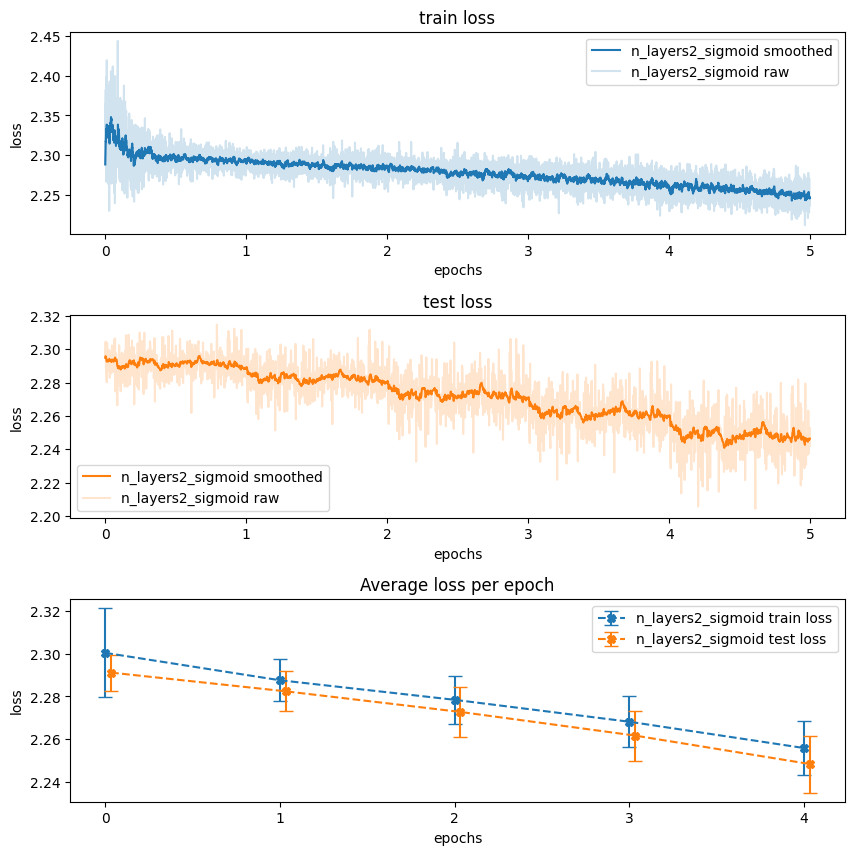

In [ ]:
history_plotter.plot([model_name])

–ê —Ç–µ–ø–µ—Ä—å –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –º–æ–¥–µ–ª—å **—Å —Ç—Ä–µ–º—è —Å–∫—Ä—ã—Ç—ã–º–∏ —Å–ª–æ—è–º–∏** –∏ –æ–¥–Ω–∏–º –≤—ã—Ö–æ–¥–Ω—ã–º —Å–ª–æ–µ–º:

In [ ]:
model_name = "n_layers3_sigmoid"
model = SimpleMNIST_NN(n_layers=3)
print(model)

SimpleMNIST_NN(
  (activation): Sigmoid()
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [ ]:
trainer = L.Trainer(
    max_epochs=5,
    logger=TensorBoardLogger(save_dir=f"logs/{model_name}"),
    num_sanity_val_steps=0,
)

pipeline = Pipeline(model=model, exp_name=model_name)

trainer.fit(model=pipeline, train_dataloaders=train_loader, val_dataloaders=val_loader)

history = pipeline.history
history["epo—Åhs"] = trainer.max_epochs
history_plotter.add(history)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | SimpleMNIST_NN   | 99.7 K | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
99.7 K    Trainable params
0         Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callb

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=5` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


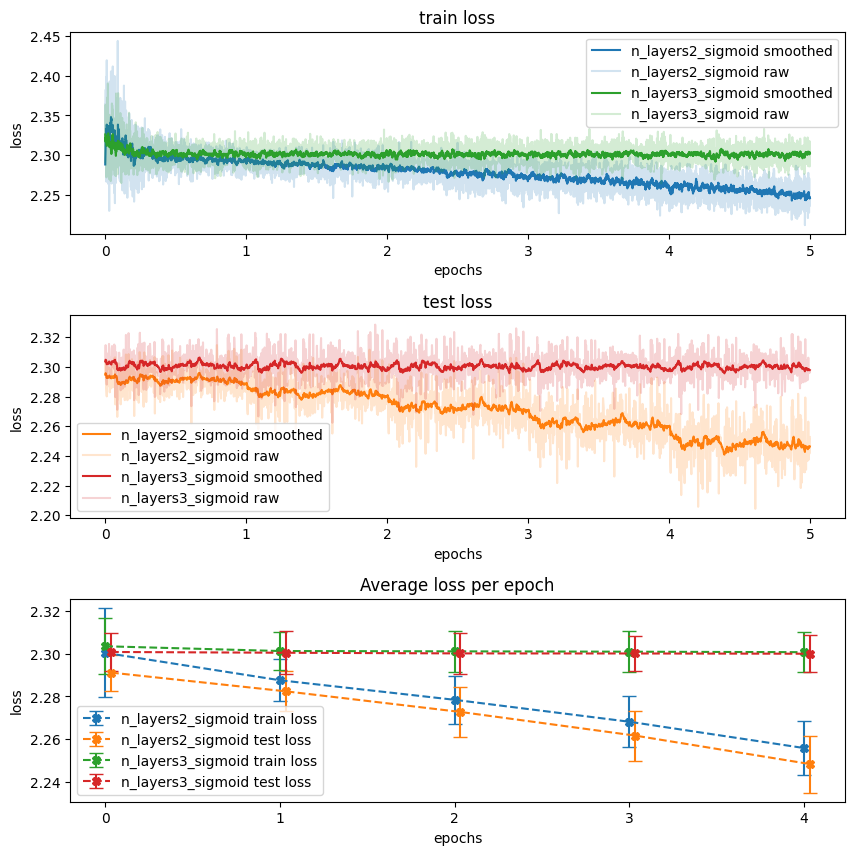

In [ ]:
history_plotter.plot(["n_layers2_sigmoid", model_name])

–ù–µ–π—Ä–æ—Å–µ—Ç—å —Å —Ç—Ä–µ–º—è —Å–ª–æ—è–º–∏ –≤–æ–æ–±—â–µ **–Ω–µ —É—á–∏—Ç—Å—è**. –ü–æ—á–µ–º—É? –ü–æ–ø—Ä–æ–±—É–µ–º —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è.

–î–ª—è —ç—Ç–æ–≥–æ –Ω–∞–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏–∏, –∫–æ—Ç–æ—Ä—ã–µ –±—É–¥—É—Ç —Å–ª–µ–¥–∏—Ç—å –∑–∞ **—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤** –∏ **–∞–∫—Ç–∏–≤–∞—Ü–∏–π** –Ω–∞ –Ω–∞—à–∏—Ö —Å–ª–æ—è—Ö.

–í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –º–µ—Ç–æ–¥–∞–º–∏ `register_forward_hook` –∏ `register_backward_hook` –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ PyTorch –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –≤—ã–ø–æ–ª–Ω—è—Ç—å —ç—Ç–∏ —Ñ—É–Ω–∫—Ü–∏–∏ –ø—Ä–∏ –∑–∞–ø—É—Å–∫–µ –ø—Ä—è–º–æ–≥–æ –∏–ª–∏ –æ–±—Ä–∞—Ç–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è —á–µ—Ä–µ–∑ –Ω–∞—à—É —Å–µ—Ç—å.

**–ó–∞–º–µ—á–∞–Ω–∏–µ:** *–ù–∞ —Å–∞–º–æ–º –¥–µ–ª–µ, –µ—Å–ª–∏ —É–≤–µ–ª–∏—á–∏—Ç—å learning rate, —Ä–∞–∑–º–µ—Ä –±–∞—Ç—á–∞ –∏–ª–∏ —á–∏—Å–ª–æ –Ω–µ–π—Ä–æ–Ω–æ–≤, —Ç–æ –Ω–µ–π—Ä–æ—Å–µ—Ç—å –Ω–∞—á–Ω–µ—Ç —É—á–∏—Ç—å—Å—è. –≠—Ç–æ —É—á–µ–±–Ω—ã–π –ø—Ä–∏–º–µ—Ä, —á—Ç–æ–±—ã –ø–æ–∫–∞–∑–∞—Ç—å, —á—Ç–æ —Ç–∞–∫–æ–µ –±—ã–≤–∞–µ—Ç.*

*–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π –∫ –∫–æ–¥—É:*

–í –∫–æ–¥–µ –Ω–∏–∂–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è [–∑–∞–º—ã–∫–∞–Ω–∏—è (closure) ‚úèÔ∏è[blog]](https://habr.com/ru/articles/781866/). –≠—Ç–æ —Ñ—É–Ω–∫—Ü–∏–∏, –æ–ø—Ä–µ–¥–µ–ª—è—é—â–∏–µ –∏ –≤–æ–∑–≤—Ä–∞—â–∞—é—â–∏–µ –¥—Ä—É–≥–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏. –û–Ω–∏ –Ω—É–∂–Ω—ã, —á—Ç–æ–±—ã –ø–µ—Ä–µ–¥–∞–≤–∞—Ç—å –≤ [–ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ –∏–º–µ–Ω ‚úèÔ∏è[blog]](https://realpython.com/python-namespaces-scope/) –≤–ª–æ–∂–µ–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ. –§—É–Ω–∫—Ü–∏–∏ `get_forward_hook` –∏ `get_backward_hook` ‚Äî —ç—Ç–æ –∑–∞–º—ã–∫–∞–Ω–∏—è.

–ó–∞—á–µ–º —Ç–∞–∫–∏–µ —Å–ª–æ–∂–Ω–æ—Å—Ç–∏? –î–µ–ª–æ –≤ —Ç–æ–º, —á—Ç–æ —Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä—É–µ–º—ã–µ –≤ `child.register_forward_hook` –∏ `child.weight.register_hook` —Ñ—É–Ω–∫—Ü–∏–∏ –¥–æ–ª–∂–Ω—ã –∏–º–µ—Ç—å —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –Ω–∞ –≤—Ö–æ–¥–µ: –¥–ª—è `forward_hook` ‚Äî `(self, input_, output)` (–Ω–∞–∑–≤–∞–Ω–∏—è, –∫—Ä–æ–º–µ `self`, –º–æ–≥—É—Ç –≤–∞—Ä—å–∏—Ä–æ–≤–∞—Ç—å—Å—è), –¥–ª—è `backward_hook` ‚Äî `(grad)` (–Ω–∞–∑–≤–∞–Ω–∏–µ –º–æ–∂–µ—Ç –≤–∞—Ä—å–∏—Ä–æ–≤–∞—Ç—å—Å—è).

–ú—ã —Ö–æ—Ç–∏–º —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –∫–∞—Ä—Ç –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤. –î–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –º—ã –∏—Å–ø–æ–ª—å–∑—É–µ–º —Å–ª–æ–≤–∞—Ä—å –ª–∏—Å—Ç–æ–≤ `defaultdict(list)`, –∫–æ—Ç–æ—Ä—ã–π –æ–ø—Ä–µ–¥–µ–ª—è–µ–º –≤ —Ñ—É–Ω–∫—Ü–∏–∏  `register_model_hooks` –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é `history_dict`. –°–ª–æ–≤–∞—Ä—å –≤ Python —è–≤–ª—è–µ—Ç—Å—è [–∏–∑–º–µ–Ω—è–µ–º—ã–º (mutable) ‚úèÔ∏è[blog]](https://realpython.com/python-mutable-vs-immutable-types/#:~:text=Python%20has%20both%20mutable%20and,dictionaries%2C%20and%20sets%20are%20mutable.) –æ–±—ä–µ–∫—Ç–æ–º. –ú—ã –ø–µ—Ä–µ–¥–∞–µ–º –≤ —Ñ—É–Ω–∫—Ü–∏–∏  `get_forward_hook` –∏ `get_backward_hook` —Å—Å—ã–ª–∫—É –Ω–∞ —Å–ª–æ–≤–∞—Ä—å, –∫—É–¥–∞ –Ω—É–∂–Ω–æ –∑–∞–ø–∏—Å—ã–≤–∞—Ç—å –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–µ –Ω–∞–º –¥–∞–Ω–Ω—ã–µ, –∏ –∫–ª—é—á –¥–ª—è —Å–ª–æ–≤–∞—Ä—è. –¢–∞–∫ –º—ã –∏–∑–≤–ª–µ–∫–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –∏–∑ —Å–µ—Ç–∏.



In [ ]:
from collections import defaultdict


def get_forward_hook(history_dict, key):
    def forward_hook(self, input_, output):
        history_dict[key] = input_[0].cpu().detach().numpy().flatten()

    return forward_hook


def get_backward_hook(history_dict, key):
    def backward_hook(grad):  # for tensors
        history_dict[key] = grad.abs().cpu().detach().numpy().flatten()

    return backward_hook


def register_model_hooks(model):
    cur_ind = 0
    history_dict = defaultdict(list)
    for child in model.layers.children():
        if isinstance(child, nn.Linear):
            forward_hook = get_forward_hook(history_dict, key=f"sigmoid_out_{cur_ind}")
            child.register_forward_hook(forward_hook)

            cur_ind += 1
            backward_hook = get_backward_hook(
                history_dict, key=f"gradient_linear_{cur_ind}"
            )
            child.weight.register_hook(backward_hook)
    return history_dict

–ó–∞–ø—É—Å—Ç–∏–º –æ–±—É—á–µ–Ω–∏–µ **–º–æ–¥–µ–ª–∏ —Å —Ç—Ä–µ–º—è —Å–ª–æ—è–º–∏**:

In [ ]:
model_name = "n_layers3_sigmoid2"
model = SimpleMNIST_NN(n_layers=3)

hooks_data_history = register_model_hooks(model)

trainer = L.Trainer(
    max_epochs=5,
    logger=TensorBoardLogger(save_dir=f"logs/{model_name}"),
    num_sanity_val_steps=0,
)

pipeline = Pipeline(model=model, exp_name=model_name)

trainer.fit(model=pipeline, train_dataloaders=train_loader, val_dataloaders=val_loader)

history = pipeline.history
history["epo—Åhs"] = trainer.max_epochs
history_plotter.add(history)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | SimpleMNIST_NN   | 99.7 K | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
99.7 K    Trainable params
0         Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callb

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=5` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


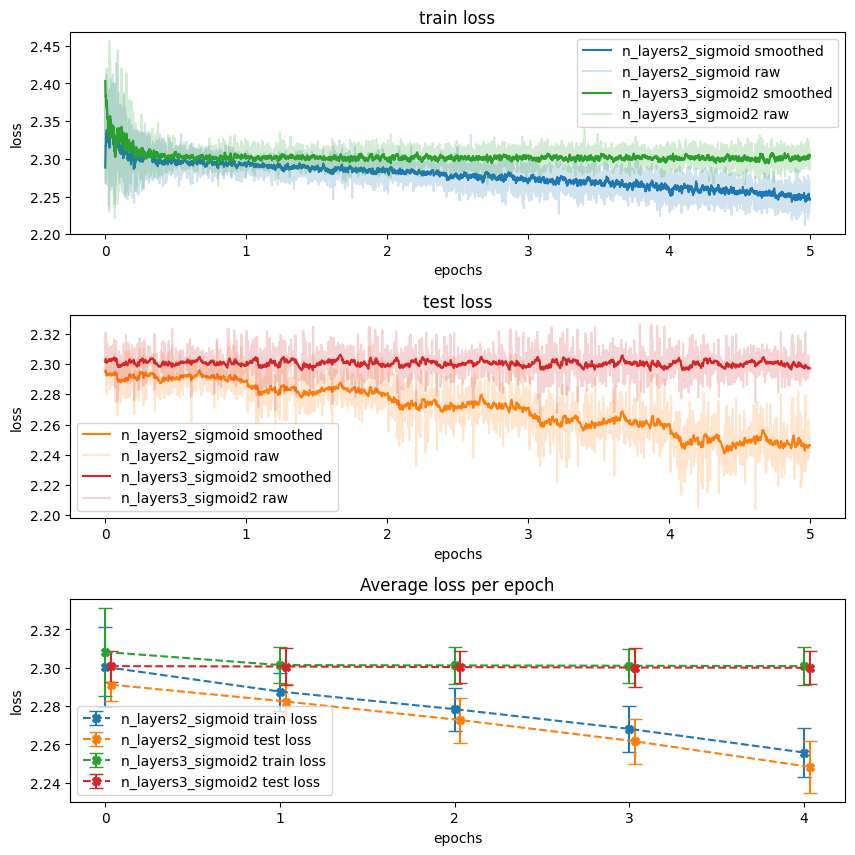

In [ ]:
history_plotter.plot(["n_layers2_sigmoid", model_name])

In [ ]:
def plot_hooks_data(hooks_data_history):
    keys = hooks_data_history.keys()
    n_layers = len(keys) // 2

    activation_names = [f"sigmoid_out_{i}" for i in range(1, n_layers)]
    activations_on_layers = [
        hooks_data_history[activation] for activation in activation_names
    ]

    gradient_names = [f"gradient_linear_{i + 1}" for i in range(n_layers)]
    gradients_on_layers = [hooks_data_history[gradient] for gradient in gradient_names]

    for plot_name, values, labels in zip(
        ["activations", "gradients"],
        [activations_on_layers, gradients_on_layers],
        [activation_names, gradient_names],
    ):
        fig, ax = plt.subplots(1, len(labels), figsize=(14, 4), sharey="row")
        for label_idx, label in enumerate(labels):
            ax[label_idx].boxplot(values[label_idx], labels=[label])
        plt.show()

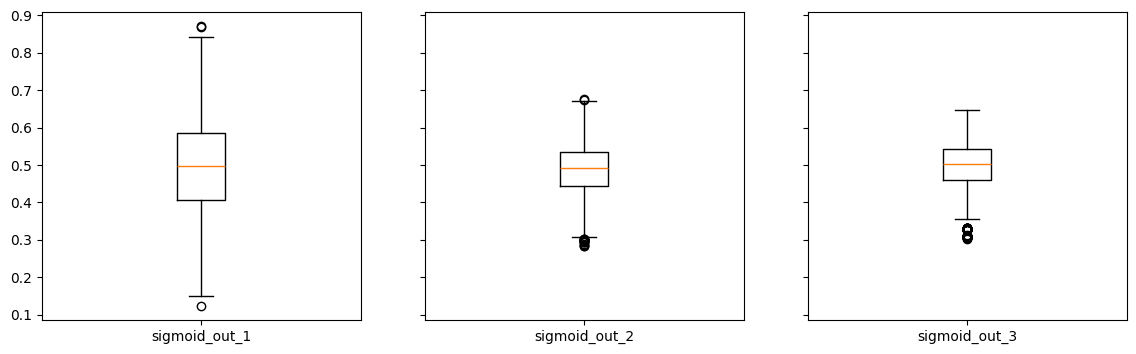

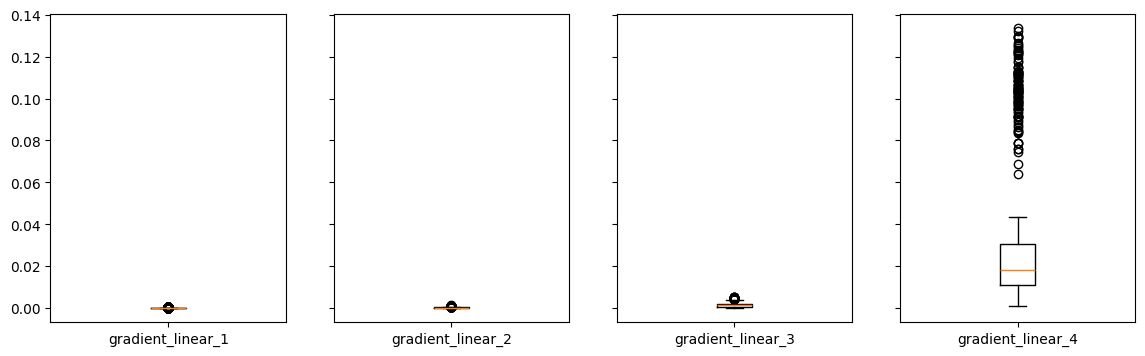

In [ ]:
plot_hooks_data(hooks_data_history)

–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç –º–æ–¥–µ–ª–∏ —Å—Ç—Ä–µ–º–∏—Ç–µ–ª—å–Ω–æ –∑–∞—Ç—É—Ö–∞–µ—Ç. –ü–µ—Ä–≤—ã–µ —Å–ª–æ–∏, –¥–æ –∫–æ—Ç–æ—Ä—ã—Ö –≥—Ä–∞–¥–∏–µ–Ω—Ç –¥–æ—Ö–æ–¥–∏—Ç –ø–æ—Å–ª–µ–¥–Ω–∏–º, –ø–æ–ª—É—á–∞—é—Ç –∑–Ω–∞—á–µ–Ω–∏—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞, –º–∞–ª–æ –æ—Ç–ª–∏—á–∏–º—ã–µ –æ—Ç –Ω—É–ª—è.



# –ó–∞—Ç—É—Ö–∞–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞



–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –æ–±—ã—á–Ω—É—é —Å–∏–≥–º–æ–∏–¥—É:

$$\sigma(z) = \dfrac 1 {1 + e^{-z}}$$

–ï–µ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è, –∫–∞–∫ –º—ã —É–∂–µ –≤—ã–≤–æ–¥–∏–ª–∏, —Ä–∞–≤–Ω–∞:

$$\dfrac {\partial \sigma(z)} {\partial z} = \sigma(z) (1 - \sigma(z))$$

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L07/out/activation_function_sigmoid.png" width="1000"></center>

–ö–∞–∫–æ–µ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —É —Ç–∞–∫–æ–π —Ñ—É–Ω–∫—Ü–∏–∏?

–°–∏–≥–º–æ–∏–¥–∞ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –æ—Ç $0$ –¥–æ $1$. **–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–æ–π** —Å–∏–≥–º–æ–∏–¥—ã  $=\dfrac 1 4$.

–¢–µ–ø–µ—Ä—å –≤–æ–∑—å–º–µ–º –Ω–µ–π—Ä–æ–Ω–Ω—É—é —Å–µ—Ç—å –∏–∑ 5 —Å–ª–æ–µ–≤:


<img src ="https://ml.gan4x4.ru/msu/dev-2.2/L07/out/simple_nn_with_sigmoid.png" width="750">

–ü–æ—Å—á–∏—Ç–∞–µ–º —É –Ω–µ–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç:

$$\dfrac {\partial L} {\partial z_4} = \dfrac {\partial L} {\partial y} \dfrac {\partial y} {\partial z_4} = \dfrac {\partial L} {\partial y} \dfrac {\partial \sigma(w_5z)} {\partial z} w_5 \le \dfrac 1 4 \dfrac {\partial L} {\partial y}  w_5 $$

–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –º–æ–∂–Ω–æ –ø–æ—Å—á–∏—Ç–∞—Ç—å –≥—Ä–∞–¥–∏–µ–Ω—Ç –¥–ª—è $z_3$:

$$\dfrac {\partial L} {\partial z_3} = \dfrac {\partial L} {\partial z_4} \dfrac {\partial z_4} {\partial z_3} \le \dfrac {\partial L} {\partial y} \dfrac {\partial \sigma(w_4z)} {\partial z} w_5 \le \left({\dfrac 1 4}\right)^2 \dfrac {\partial L} {\partial y}  w_5 w_4$$

–ò —Ç–∞–∫ –¥–∞–ª–µ–µ:

$$\dfrac {\partial L} {\partial x}  \le \left({\dfrac 1 4}\right)^5 \dfrac {\partial L} {\partial y}  w_5 w_4 w_3 w_2 w_1$$

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –ø—Ä–∏ **–º–∞–ª–µ–Ω—å–∫–∏—Ö –≤–µ—Å–∞—Ö** –≥—Ä–∞–¥–∏–µ–Ω—Ç –Ω–∞—á–∏–Ω–∞–µ—Ç **—ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –∑–∞—Ç—É—Ö–∞—Ç—å**.

–ü—Ä–∏ **–±–æ–ª—å—à–∏—Ö –≤–µ—Å–∞—Ö**, –∏–∑-–∑–∞ chain-rule, –º–æ–∂–µ—Ç –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç—å **–≤–∑—Ä—ã–≤ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞**. –í–∑—Ä—ã–≤—É –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞ –æ—Å–æ–±–µ–Ω–Ω–æ –ø–æ–¥–≤–µ—Ä–∂–µ–Ω—ã —Ä–µ–∫—É—Ä—Ä–µ–Ω—Ç–Ω—ã–µ –Ω–µ–π—Ä–æ–Ω–Ω—ã–µ —Å–µ—Ç–∏, –æ –∫–æ—Ç–æ—Ä—ã—Ö –±—É–¥–µ—Ç —Ä–∞—Å—Å–∫–∞–∑–∞–Ω–æ –ø–æ–∑–∂–µ (–≤ –Ω–∏—Ö —Å–∏–≥–Ω–∞–ª—ã –ø—Ä–æ–ø—É—Å–∫–∞—é—Ç—Å—è —á–µ—Ä–µ–∑ –æ–¥–∏–Ω –∏ —Ç–æ—Ç –∂–µ –±–ª–æ–∫ —Å –æ–¥–Ω–∏–º–∏ –∏ —Ç–µ–º–∏ –∂–µ –≤–µ—Å–∞–º–∏), –∞ —Ç–∞–∫–∂–µ —Å–µ—Ç–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º SoftMax (—ç—Ç–æ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –≤ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞—Ö —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–æ–≤).

–î–ª—è –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Ñ—É–Ω–∫—Ü–∏–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –∫–∞—Ä—Ç–∏–Ω–∞ –±—É–¥–µ—Ç –Ω–µ —Å—Ç–æ–ª—å –∫–∞—Ç–∞—Å—Ç—Ä–æ—Ñ–∏—á–Ω–∞, –Ω–æ —Ç–æ–∂–µ –Ω–µ–ø—Ä–∏—è—Ç–Ω–∞.
–ü—Ä–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–∏ –∑–∞–¥–∞–Ω–∏–π –≤—ã –ø–æ—Å–º–æ—Ç—Ä–∏—Ç–µ, –Ω–∞–ø—Ä–∏–º–µ—Ä, –∫–∞–∫ –≤–µ–¥–µ—Ç —Å–µ–±—è —Ñ—É–Ω–∫—Ü–∏—è **ReLU** –≤ —ç—Ç–æ–º —Å–ª—É—á–∞–µ.

–î–∞–≤–∞–π—Ç–µ –ø–æ–¥—É–º–∞–µ–º, —á—Ç–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —Å –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç—å—é, —á—Ç–æ–±—ã –æ–Ω–∞ –Ω–∞—á–∞–ª–∞ —É—á–∏—Ç—å—Å—è. –í –Ω–∞—á–∞–ª–µ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –º–µ—Ç–æ–¥—ã, **–Ω–µ –∏–∑–º–µ–Ω—è—é—â–∏–µ —Å—Ç—Ä—É–∫—Ç—É—Ä—É —Å–µ—Ç–∏** (–±–µ–∑ –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö —Å–ª–æ–µ–≤), —Ç–∞–∫–∂–µ –∑–∞—Ñ–∏–∫—Å–∏—Ä—É–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–µ–π—Ä–æ–Ω–æ–≤ –∏ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞.


# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –≤—Ö–æ–¥–æ–≤ –∏ –≤—ã—Ö–æ–¥–æ–≤

–ù–∞—á–Ω–µ–º —Å —É–∂–µ –∑–Ω–∞–∫–æ–º–æ–≥–æ: **–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è**.

## –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

–ü—Ä–µ–¥—Å—Ç–∞–≤–∏–º —Å–µ–±–µ, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –ø–æ–¥–∞–µ–º –≤ –Ω–µ–π—Ä–æ—Å–µ—Ç—å, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º:

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L07/out/data_before_normalization.png" width="400"></center>

–§–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ–π—Ä–æ—Å–µ—Ç–∏ —Ä–∞–±–æ—Ç–∞—é—Ç —Å–æ —Å–∫–∞–ª—è—Ä–Ω—ã–º–∏ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏—è–º–∏. –í —ç—Ç–æ–º –ø–ª–∞–Ω–µ –¥–≤–∞ –≤–µ–∫—Ç–æ—Ä–∞, –∏–∑–æ–±—Ä–∞–∂–µ–Ω–Ω—ã–µ –Ω–∞ —Ä–∏—Å—É–Ω–∫–µ, **–Ω–µ —Å–∏–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è**. –¢–∞–∫–∂–µ –∏ —Ç–æ—á–∫–∏ –Ω–∞—à–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ —Å–ª–∞–±–æ —Ä–∞–∑–¥–µ–ª–∏–º—ã. –ß—Ç–æ–±—ã —Å —ç—Ç–∏–º —Ä–∞–±–æ—Ç–∞—Ç—å, –Ω–µ–π—Ä–æ—Å–µ—Ç—å —Å–Ω–∞—á–∞–ª–∞ –¥–æ–ª–∂–Ω–∞ –ø–æ–¥–æ–±—Ä–∞—Ç—å **—É–¥–æ–±–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ**, –∞ –∑–∞—Ç–µ–º —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å –æ–±—ä–µ–∫—Ç—ã. –ü–æ–Ω—è—Ç–Ω–æ, —á—Ç–æ —ç—Ç–æ —É—Å–ª–æ–∂–Ω—è–µ—Ç –∑–∞–¥–∞—á—É.

–î–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –æ–±–ª–µ–≥—á–∏—Ç—å –Ω–µ–π—Ä–æ—Å–µ—Ç–∏ –∑–∞–¥–∞—á—É, –≤—Ö–æ–¥–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —á–∞—Å—Ç–æ **–Ω–æ—Ä–º–∏—Ä—É—é—Ç**:

$$x1' = \dfrac {x1 - \mu_{x1}} {\sigma_{x1}}$$

$$x2' = \dfrac {x2 - \mu_{x2}} {\sigma_{x2}}$$

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L07/out/data_after_normalization.png" width="450"></center>


 –¢–∞–∫–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –ø–æ–º–æ–≥–∞–µ—Ç –Ω–µ–π—Ä–æ—Å–µ—Ç–∏:

$$ \large J(w,b) = \frac1m \sum L(\hat{y^i}, y^i)$$

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L07/out/normalization_helps_find_minimum_of_function.png" width="700"></center>

<center><em>–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ–∑–≤–æ–ª—è–µ—Ç –∏—Å–∫–∞—Ç—å –º–∏–Ω–∏–º—É–º —Ü–µ–ª–µ–≤–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ —É–¥–æ–±–Ω–µ–µ –∏ –±—ã—Å—Ç—Ä–µ–µ</em></center>


## –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è —Ü–µ–ª–µ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∑–∞–¥–∞—á–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

–í —Ä—è–¥–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–π —Ç–∞–∫–∂–µ –Ω—É–∂–Ω–∞ **–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –≤—ã—Ö–æ–¥–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π**, –Ω–∞–ø—Ä–∏–º–µ—Ä, –≤ –∑–∞–¥–∞—á–µ **—Ä–µ–≥—Ä–µ—Å—Å–∏–∏**. –°—É—â–µ—Å—Ç–≤—É–µ—Ç –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–∏—á–∏–Ω, –ø–æ—á–µ–º—É —ç—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ.

### –í–∑—Ä—ã–≤ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞

–í –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ —Å–ª—É—á–∞–µ–≤ –º—ã **–Ω–æ—Ä–º–∞–ª–∏–∑—É–µ–º –≤—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ**, —á—Ç–æ–±—ã —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –±—ã–ª–æ —Ä–∞–≤–Ω–æ $0$.

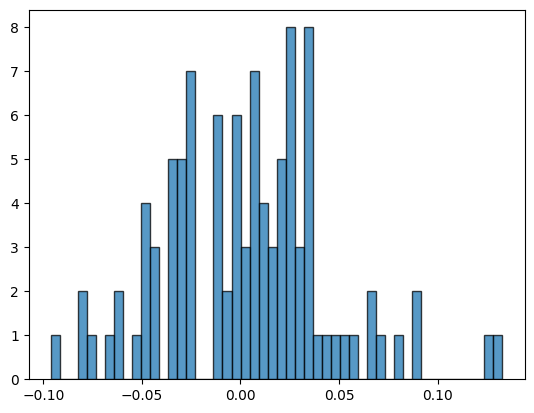

X mean: 0.00 X variance: 0.99


In [ ]:
import torch
import matplotlib.pyplot as plt

x = torch.randn((512, 100))  # Fake normalized data
plt.hist(x.mean(dim=0), bins=50, alpha=0.75, edgecolor="black")
plt.show()
print(f"X mean: {x.mean().item():.2f} X variance: {x.var().item():.2f}")

–ö—Ä–æ–º–µ —ç—Ç–æ–≥–æ –º—ã –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–º **—Å–ª—É—á–∞–π–Ω—ã–º** –æ–±—Ä–∞–∑–æ–º –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –≤–µ—Å–∞.

In [ ]:
from torch import nn

net = nn.Sequential(
    nn.Linear(100, 50),  # weights randomly sampled from some random distribution
    nn.Sigmoid(),
    nn.Linear(50, 1),
)

–í–µ—Å–∞ **–Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –≤–æ–∫—Ä—É–≥ –Ω—É–ª—è**:




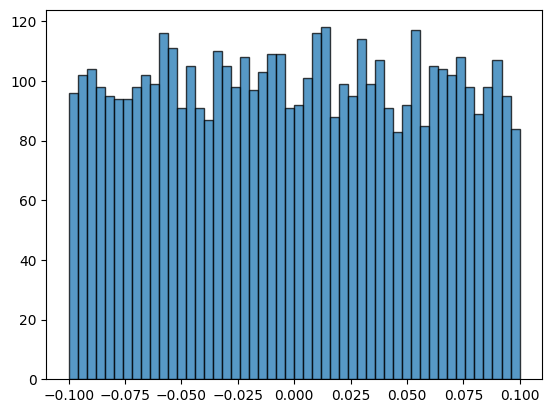

Weights mean: -0.00,  Weights variance: 0.00


In [ ]:
weights = net[0].weight.data.numpy()
plt.hist(weights.flatten(), bins=50, alpha=0.75, edgecolor="black")
plt.show()

print(f"Weights mean: {weights.mean():.2f},  Weights variance: {weights.var():.2f}")

–ù–µ–æ–±—É—á–µ–Ω–Ω–∞—è —Å–µ—Ç—å –±—É–¥–µ—Ç —á–∞—â–µ –≤—Å–µ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ—Ä—è–¥–∫–∞ $10^{-1}$.

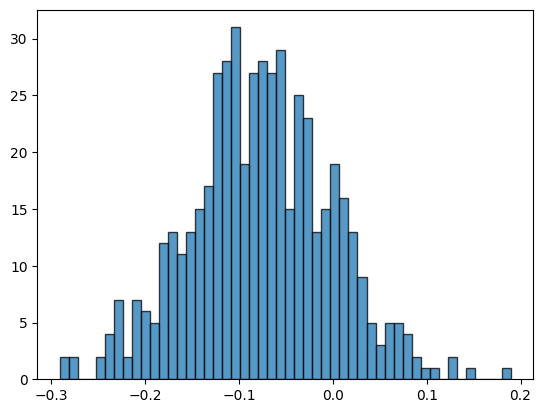

Out mean: -0.08, Out variance: 0.01


In [ ]:
out = net(x)
plt.hist(out.detach().numpy(), bins=50, alpha=0.75, edgecolor="black")
plt.show()

print(f"Out mean: {out.mean().item():.2f}, Out variance: {out.var().item():.2f}")

–ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, –º—ã –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ–º –∫–∞–∫—É—é-—Ç–æ –±–æ–ª—å—à—É—é –≤–µ–ª–∏—á–∏–Ω—É. –ù–∞–ø—Ä–∏–º–µ—Ä, [—Å—Ç–æ–∏–º–æ—Å—Ç—å –¥–æ–º–∞ –≤ —à—Ç–∞—Ç–µ –ö–∞–ª–∏—Ñ–æ—Ä–Ω–∏—è –≤ –¥–æ–ª–ª–∞—Ä–∞—Ö üõ†Ô∏è[doc]](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) (–≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –≤ Sklearn —Ü–µ–ª–µ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–æ –Ω–∞ $100\ 000\$$). –°—Ç–æ–∏–º–æ—Å—Ç—å –ª–µ–∂–∏—Ç –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ –æ—Ç $15\ 000\$$ –¥–æ $500\ 000\$$.

–í—ã–±–µ—Ä–µ–º —Å–ª—É—á–∞–π–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —ç—Ç–æ–º –¥–∏–∞–ø–∞–∑–æ–Ω–µ.

In [ ]:
# fake cost
targets = torch.randint(15_000, 500_000, (512, 1), dtype=torch.float32)
print(f"Target example: {targets[:10].flatten()}")

Target example: tensor([ 94967., 457708., 352809., 150987.,  80811., 122480., 399874., 255717.,
        257287., 487099.])


–ï—Å–ª–∏ –º—ã –±—É–¥–µ–º –ø—ã—Ç–∞—Ç—å—Å—è –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å —ç—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏—è, –º—ã –ø–æ–ª—É—á–∏–º **–æ—á–µ–Ω—å –±–æ–ª—å—à—É—é –æ—à–∏–±–∫—É**.

In [ ]:
criterion = nn.MSELoss()
loss = criterion(out, targets)
loss.backward()

print(f"Loss: {loss.item():.2f}")

Loss: 87905878016.00


–≠—Ç–∞ –æ—à–∏–±–∫–∞ –ø—Ä–∏–≤–µ–¥–µ—Ç –∫ **–±–æ–ª—å—à–∏–º –∑–Ω–∞—á–µ–Ω–∏—è–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞** (c–º–æ—Ç—Ä–∏–º –Ω–∞ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –æ—Å–∏ –∞–±—Å—Ü–∏—Å—Å), **–±–æ–ª—å—à–∏–º –∑–Ω–∞—á–µ–Ω–∏—è–º –≤–µ—Å–æ–≤** –∏ **–Ω–µ—Å—Ç–∞–±–∏–ª—å–Ω–æ–º—É –æ–±—É—á–µ–Ω–∏—é**. –ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ –≤–∏–¥–Ω–æ, —á—Ç–æ 2 —Å–ª–æ–π —Å–µ—Ç–∏ –ø–æ–ª—É—á–∏—Ç –±–æ–ª—å—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤ –∏ —Å–æ–æ—Ç–≤–µ—Å—Ç–≤–µ–Ω–Ω–æ —Å–∏–ª—å–Ω–æ –∏–∑–º–µ–Ω–∏—Ç –∑–Ω–∞—á–µ–Ω–∏—è –≤–µ—Å–æ–≤.

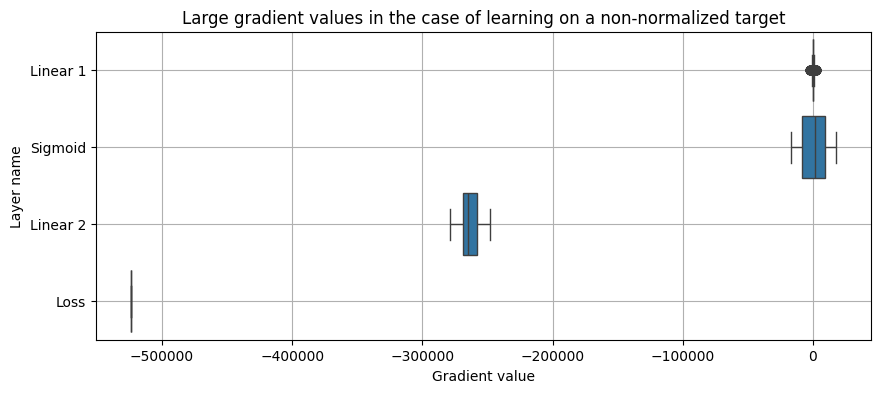

In [ ]:
import pandas as pd
import seaborn as sns

layer_names = ("Linear 1", "Sigmoid", "Linear 2", "Loss")
gradient_values = {}
for layer_name, p in zip(layer_names, net.parameters()):
    gradient_values[layer_name] = pd.Series(p.grad.detach().flatten().numpy())

gradient_values = pd.DataFrame(gradient_values)
data_to_plot = gradient_values.melt(value_name="Gradient value", var_name="Layer name")

plt.figure(figsize=(10, 4))
sns.boxplot(data=data_to_plot, x="Gradient value", y="Layer name")
plt.grid()
plt.title(f"Large gradient values in the case of learning on a non-normalized target")
plt.show()

–ï—Å–ª–∏ –º—ã **—Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑—É–µ–º —Ü–µ–ª–µ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è**:

In [ ]:
mean = targets.float().mean()
std = targets.float().std()

transformed_targets = (targets - mean) / std
print(transformed_targets.flatten()[:10])

tensor([-1.1994,  1.4073,  0.6535, -0.7968, -1.3011, -1.0017,  0.9917, -0.0442,
        -0.0330,  1.6185])


–¢–æ –ø–æ–ª—É—á–∏–º –æ—à–∏–±–∫—É –Ω–∞ 10 –ø–æ—Ä—è–¥–∫–æ–≤ **–º–µ–Ω—å—à–µ**:

In [ ]:
net.zero_grad()
out = net(x)
loss = criterion(out, transformed_targets)
loss.backward()

print(f"Loss: {loss.item():.2f}")

Loss: 1.02


–ò **–Ω–µ–±–æ–ª—å—à–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã** (c–º–æ—Ç—Ä–∏–º –Ω–∞ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –æ—Å–∏ –∞–±c—Ü–∏—Å—Å):


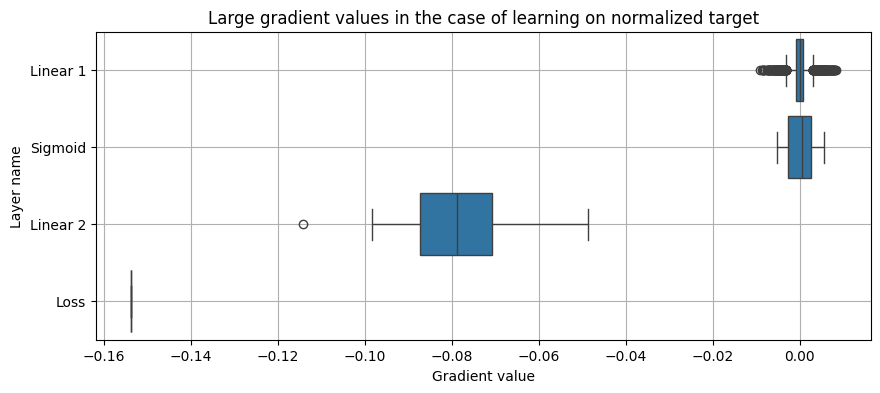

In [ ]:
layer_names = ("Linear 1", "Sigmoid", "Linear 2", "Loss")
gradient_values = {}
for layer_name, p in zip(layer_names, net.parameters()):
    gradient_values[layer_name] = pd.Series(p.grad.detach().flatten().numpy())

gradient_values = pd.DataFrame(gradient_values)
data_to_plot = gradient_values.melt(value_name="Gradient value", var_name="Layer name")

plt.figure(figsize=(10, 4))
sns.boxplot(data=data_to_plot, x="Gradient value", y="Layer name")
plt.grid()
plt.title(f"Large gradient values in the case of learning on normalized target")
plt.show()

### Multi-Dimensional —Ä–µ–≥—Ä–µ—Å—Å–∏—è

–í —Ä—è–¥–µ –∑–∞–¥–∞—á, –Ω–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä–∏ [**–∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π –¥–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è —Ñ–∏–∑–∏—á–µ—Å–∫–∏—Ö –ø—Ä–æ—Ü–µ—Å—Å–æ–≤** üéì[arxiv]](https://arxiv.org/abs/2007.13875), –≤ –∑–∞–¥–∞—á–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –≤—ã—á–∏—Å–ª—è—Ç—å **–Ω–µ—Å–∫–æ–ª—å–∫–æ —Ü–µ–ª–µ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π**. –ü—Ä–∏ —ç—Ç–æ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø–æ–º–Ω–∏—Ç—å, —á—Ç–æ –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª–∞ –æ—à–∏–±–∫–∏ –≤ –∑–∞–¥–∞—á–∞—Ö —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —á–∞—Å—Ç–æ –≤—ã–±–∏—Ä–∞–µ—Ç—Å—è **–º–µ—Ç—Ä–∏–∫–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è**, –∞ —Ñ–∏–∑–∏—á–µ—Å–∫–∏–µ –≤–µ–ª–∏—á–∏–Ω—ã –º–æ–≥—É—Ç –∏–º–µ—Ç—å **—Ä–∞–∑–ª–∏—á–Ω—ã–π –ø–æ—Ä—è–¥–æ–∫** –∏ **–¥–∏–∞–ø–∞–∑–æ–Ω –∑–Ω–∞—á–µ–Ω–∏–π**.

–ù–µ —Å–∞–º–∞—è –ª—É—á—à–∞—è –∏–¥–µ—è ‚Äî —Å—á–∏—Ç–∞—Ç—å —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ, –∫–æ–≥–¥–∞ –ø–æ –æ–¥–Ω–æ–π –æ—Å–∏ –æ—Ç–ª–æ–∂–µ–Ω—ã –Ω–∞–Ω–æ–º–µ—Ç—Ä—ã, –∞ –ø–æ –¥—Ä—É–≥–æ–π ‚Äî –∫–∏–ª–æ–≥—Ä–∞–º–º—ã.


–í —Ñ–∏–∑–∏—á–µ—Å–∫–∏—Ö –∑–∞–¥–∞—á–∞—Ö –ø–æ–ª–µ–∑–Ω–æ –∏–∑—É—á–∏—Ç—å, –∫–∞–∫–∏–µ –Ω–æ—Ä–º–∏—Ä–æ–≤–∫–∏ –∏—Å–ø–æ–ª—å–∑—É—é—Ç –≤ **—á–∏—Å–ª–µ–Ω–Ω—ã—Ö –º–µ—Ç–æ–¥–∞—Ö** –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è [–±–µ–∑—Ä–∞–∑–º–µ—Ä–Ω—ã—Ö (**dimensionless**) –≤–µ–ª–∏—á–∏–Ω üìö[book]](https://www.physics.umd.edu/perg/MathPhys/content/2/pstruc/dimsDE.htm). –≠—Ç–æ –º–æ–∂–µ—Ç –ø–æ–¥—Å–∫–∞–∑–∞—Ç—å —Ö–æ—Ä–æ—à—É—é, —Ñ–∏–∑–∏—á–µ—Å–∫–∏ –æ–±–æ—Å–Ω–æ–≤–∞–Ω–Ω—É—é –Ω–æ—Ä–º–∏—Ä–æ–≤–∫—É.


# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –≤–µ—Å–æ–≤

–û–¥–Ω–∏–º –∏–∑ —Å–ø–æ—Å–æ–±–æ–≤ –±–æ—Ä—å–±—ã —Å –∑–∞—Ç—É—Ö–∞—é—â–∏–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–º —è–≤–ª—è–µ—Ç—Å—è –ø—Ä–∞–≤–∏–ª—å–Ω–∞—è **–∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –≤–µ—Å–æ–≤**. –ö–∞–∫ —ç—Ç–æ —Å–¥–µ–ª–∞—Ç—å?

**–ò–¥–µ—è 1:** –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –≤—Å–µ –≤–µ—Å–∞ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–æ–π.

–ü—Ä–æ–±–ª–µ–º–∞: –≥—Ä–∞–¥–∏–µ–Ω—Ç –ø–æ –≤—Å–µ–º –≤–µ—Å–∞–º –±—É–¥–µ—Ç –æ–¥–∏–Ω–∞–∫–æ–≤, –∫–∞–∫ –∏ –æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ –≤–µ—Å–æ–≤. –í—Å–µ –Ω–µ–π—Ä–æ–Ω—ã –≤ —Å–ª–æ–µ –±—É–¥—É—Ç —É—á–∏—Ç—å –æ–¥–Ω–æ –∏ —Ç–æ –∂–µ, –∏–ª–∏, –≤ —Å–ª—É—á–∞–µ $\text{const} = 0$ –∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ $\text{ReLU}$, [–Ω–µ –±—É–¥—É—Ç —É—á–∏—Ç—å—Å—è –≤–æ–æ–±—â–µ ‚úèÔ∏è[blog]](https://habr.com/ru/post/592711/).

**–í—ã–≤–æ–¥:** –≤ –∫–∞—á–µ—Å—Ç–≤–µ –Ω–∞—á–∞–ª—å–Ω—ã—Ö –≤–µ—Å–æ–≤ –Ω—É–∂–Ω–æ –≤—ã–±–∏—Ä–∞—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.

**–ò–¥–µ—è 2:** –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –≤–µ—Å–∞ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º (–ì–∞—É—Å—Å–æ–≤—Å–∫–∏–º) —à—É–º–æ–º —Å –º–∞—Ç–æ–∂–∏–¥–∞–Ω–∏–µ–º $0$ –∏ –º–∞–ª–µ–Ω—å–∫–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–µ–π.

–ú–∞–ª–µ–Ω—å–∫–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è –Ω—É–∂–Ω–∞, —á—Ç–æ–±—ã –Ω–µ –ø–æ–ª—É—á–∏—Ç—å –æ–≥—Ä–æ–º–Ω—ã–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã –∑–∞ –±–æ–ª—å—à–∏–µ –∏–∑–Ω–∞—á–∞–ª—å–Ω—ã–µ –æ—à–∏–±–∫–∏ –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–∏.

**–ü—Ä–æ–±–ª–µ–º–∞:** –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —à—É–º–æ–º –Ω–µ –≥–∞—Ä–∞–Ω—Ç–∏—Ä—É–µ—Ç –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –≤–∑—Ä—ã–≤–∞ –∏–ª–∏ –∑–∞—Ç—É—Ö–∞–Ω–∏—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞.

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ:

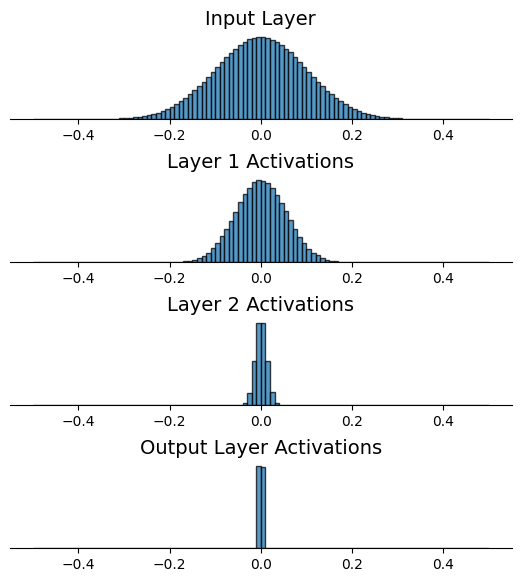

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_act(ax, x, layer_name):
    ax.hist(x.flatten(), bins=100, range=(-0.5, 0.5), alpha=0.75, edgecolor="black")
    ax.set_title(f"{layer_name}", fontsize=14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='y', left=False, labelleft=False)

class NeuralNet:
    def __init__(self):
        np.random.seed(42)
        self.W1 = np.random.randn(3072, 500) * 0.01
        self.W2 = np.random.randn(500, 100) * 0.01
        self.W3 = np.random.randn(100, 10) * 0.01

    def predict(self, x):
        fig, axs = plt.subplots(4, 1, figsize=(6, 6))
        fig.tight_layout(pad=2)

        show_act(axs[0], x, "Input Layer")

        scores1 = x.dot(self.W1)
        activations1 = np.tanh(scores1)
        show_act(axs[1], activations1, "Layer 1 Activations")

        scores2 = activations1.dot(self.W2)
        activations2 = np.tanh(scores2)
        show_act(axs[2], activations2, "Layer 2 Activations")

        scores3 = activations2.dot(self.W3)
        show_act(axs[3], scores3, "Output Layer Activations")

        return scores3

x = np.random.randn(1000, 3072) * 0.1

simple_net = NeuralNet()
scores = simple_net.predict(x)


**–ò–¥–µ—è 3:** —Ñ–æ—Ä–º–∞–ª–∏–∑—É–µ–º —É—Å–ª–æ–≤–∏—è, –ø—Ä–∏ –∫–æ—Ç–æ—Ä—ã—Ö –≤–∑—Ä—ã–≤ –∏ –∑–∞—Ç—É—Ö–∞–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤ –Ω–µ –±—É–¥—É—Ç –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç—å.

1. –ù–∞–º –±—ã —Ö–æ—Ç–µ–ª–æ—Å—å, —á—Ç–æ–±—ã **–¥–∏—Å–ø–µ—Ä—Å–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤**, –ø–æ–ª—É—á–∞–µ–º—ã—Ö –Ω–∞ –∫–∞–∂–¥–æ–º —Å–ª–æ–µ, –±—ã–ª–∏ –æ–¥–∏–Ω–∞–∫–æ–≤—ã (—Ç.–µ –º—ã —Ö–æ—Ç–∏–º –∑–∞–¥–∞—Ç—å –Ω–∞—á–∞–ª—å–Ω—ã–µ –≤–µ—Å–∞ —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —á—Ç–æ–±—ã –≤—Ö–æ–¥–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∫–∞–∂–¥–æ–≥–æ –ª–∏–Ω–µ–π–Ω–æ–≥–æ —Å–ª–æ—è –±—ã–ª–∏ **–æ–¥–∏–Ω–∞–∫–æ–≤–æ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω—ã**).

–≠—Ç–æ –≤–∞–∂–Ω–æ, —Ç.–∫. –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –ø—Ä–∏ —Ä–∞—Å—á–µ—Ç–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞. –ù–∞–ø—Ä–∏–º–µ—Ä, –¥–ª—è –ª–∏–Ω–µ–π–Ω–æ–≥–æ —Å–ª–æ—è:

$$y = wx+b$$
$$\dfrac{\partial y} {\partial w} = x$$

–ó–∞–ø–∏—à–µ–º —ç—Ç–æ —É—Å–ª–æ–≤–∏–µ:

$$Dz^i = Dz^j \tag{1}$$

2. –ù–∞–º –±—ã —Ö–æ—Ç–µ–ª–æ—Å—å, —á—Ç–æ–±—ã **–¥–∏—Å–ø–µ—Ä—Å–∏–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤** –¥–ª—è —Ä–∞–∑–Ω—ã—Ö —Å–ª–æ–µ–≤ –±—ã–ª–∏ –æ–¥–∏–Ω–∞–∫–æ–≤—ã:

$$D\dfrac {\partial L} {\partial z^i} = D\dfrac {\partial L} {\partial z^j} \tag{2}$$


–ü—Ä–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–∏ —ç—Ç–∏—Ö —É—Å–ª–æ–≤–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç **–Ω–µ –∑–∞—Ç—É—Ö–∞–µ—Ç** –∏ **–Ω–µ –≤–∑—Ä—ã–≤–∞–µ—Ç—Å—è**.

–ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –ö—Å–∞–≤—å–µ –∏ –ö–∞–π–º–∏–Ω –•–µ –≤—ã–≤–æ–¥—è—Ç—Å—è –∏–∑ —ç—Ç–∏—Ö —É—Å–ª–æ–≤–∏–π.

## –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –ö—Å–∞–≤—å–µ (Xavier Glorot)

–ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –ö—Å–∞–≤—å–µ –±—ã–ª–∞ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∞ –≤ —Å—Ç–∞—Ç—å–µ [Understanding the difficulty of training deep feedforward neural networks (Xavier et al., 2010) üéì[article]](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf). –û–Ω–∞ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω—ã—Ö —Ñ—É–Ω–∫—Ü–∏–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ (**Sigmoid**, **Tanh**).

–ü—Ä–∏ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –≤–µ—Å–æ–≤ [—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º üìö[wiki]](https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D0%BF%D1%80%D0%B5%D1%80%D1%8B%D0%B2%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B2%D0%BD%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) —É—Å–ª–æ–≤–∏—è (1) –∏ (2) –ø—Ä–µ–æ–±—Ä–∞–∑—É—é—Ç—Å—è –≤:

 $$W_i \sim U[-\sqrt{\dfrac {6} {n_i + n_{i + 1}}}, \sqrt{\dfrac {6} {n_i + n_{i + 1}}}],$$

–≥–¥–µ $n_i$ ‚Äî —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –≤—ã—Ö–æ–¥–∞ $i$-–≥–æ —Å–ª–æ—è.

–ü—Ä–∏ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –≤–µ—Å–æ–≤ [–Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º üìö[wiki]](https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) —É—Å–ª–æ–≤–∏—è (1) –∏ (2) –ø—Ä–µ–æ–±—Ä–∞–∑—É—é—Ç—Å—è –≤:

$$W_i \sim N (0,  \text{std}=\sqrt{\dfrac{2}{n_i + n_{i + 1}}})$$

–ú–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ª—é–±–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ.

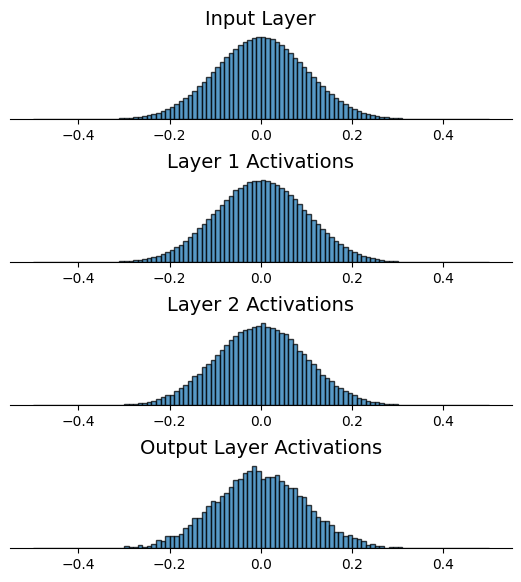

In [ ]:
class NeuralNet_Xavier(NeuralNet):
    def __init__(self):
        np.random.seed(42)
        self.W1 = np.random.randn(3072, 500) * np.sqrt(1 / 3072)
        self.W2 = np.random.randn(500, 100) * np.sqrt(1 / 500)
        self.W3 = np.random.randn(100, 10) * np.sqrt(1 / 100)

x = np.random.randn(1000, 3072) * 0.1

simple_net = NeuralNet_Xavier()
scores = simple_net.predict(x)


## –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –ö–∞–π–º–∏–Ω –•–µ (Kaiming He)

–ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –ö–∞–π–º–∏–Ω –•–µ –±—ã–ª–∞ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∞ –≤ —Å—Ç–∞—Ç—å–µ
[Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification (He et al., 2015) üéì [arxiv]](https://arxiv.org/pdf/1502.01852v1.pdf). –û–Ω–∞ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è —Ñ—É–Ω–∫—Ü–∏–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ **ReLU** –∏ –µ–µ –º–æ–¥–∏—Ñ–∏–∫–∞—Ü–∏–π (**PReLU**, **Leaky ReLU** –∏ —Ç.–¥.).

–ü—Ä–∏ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –≤–µ—Å–æ–≤ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º —É—Å–ª–æ–≤–∏—è (1) –∏ (2) –ø—Ä–µ–æ–±—Ä–∞–∑—É—é—Ç—Å—è –≤:

$$W_i \sim N(0, \text{std}=\sqrt{\frac 2 {n_i}})$$

–î–ª—è —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:
$$W_i \sim U(-\sqrt{\frac 3 {n_i}}, \sqrt{\frac 3 {n_i}})$$



–ü–æ–¥—Ä–æ–±–Ω—ã–π –≤—ã–≤–æ–¥ —Ñ–æ—Ä–º—É–ª:

[[colab] ü•® –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –≤–µ—Å–æ–≤](https://colab.research.google.com/drive/1RzBp0oBmX5HoiptrsGHQ9qKB1GFFfx44)

## –í–∞–∂–Ω–æ—Å—Ç—å –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –≤–µ—Å–æ–≤

–ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –≤–µ—Å–æ–≤ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –≤–ª–∏—è–ª–∞ –Ω–∞ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è –¥–æ –ø–æ—è–≤–ª–µ–Ω–∏—è —Å–ª–æ–µ–≤ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏, –æ –∫–æ—Ç–æ—Ä—ã—Ö –≤—ã —É–∑–Ω–∞–µ—Ç–µ –¥–∞–ª–µ–µ. –ü—Ä–∏ –Ω–∞–ª–∏—á–∏–∏ —Å–ª–æ–µ–≤ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –æ–Ω–∞ –ª–∏—à—å –Ω–µ–º–Ω–æ–≥–æ —É—Å–∫–æ—Ä—è–µ—Ç —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å –≤ –Ω–∞—á–∞–ª–µ –æ–±—É—á–µ–Ω–∏—è.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∏–∑ —Å—Ç–∞—Ç—å–∏ [Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification (He et al., 2015) üéì[arxiv]](https://arxiv.org/pdf/1502.01852v1.pdf) (–æ–Ω–∏ –ø–æ–ª—É—á–µ–Ω—ã **–±–µ–∑ —Å–ª–æ–µ–≤ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏**).

1. –ù–µ–π—Ä–æ—Å–µ—Ç—å –º–æ–∂–µ—Ç **—Å–æ–π—Ç–∏—Å—å –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±—ã—Å—Ç—Ä–µ–µ**. –ì—Ä–∞—Ñ–∏–∫–∏ –¥–ª—è –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ **ReLU**:


<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L07/out/weight_initialization_influence_convergence_neural_networks.png" width="600"></center>

<center><em>–û–±—É—á–µ–Ω–∏–µ –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ —Å 22 —Å–ª–æ—è–º–∏ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ Kaiming He –∏ Xavier</em></center>

<center><em>Source: <a href="https://arxiv.org/pdf/1502.01852v1.pdf">Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification</a></em></center>



2. –í –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –≤—ã–±—Ä–∞–Ω–Ω–æ–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ —Å–µ—Ç—å –≤–æ–æ–±—â–µ –º–æ–∂–µ—Ç **—Å–æ–π—Ç–∏—Å—å –∏–ª–∏ –Ω–µ —Å–æ–π—Ç–∏—Å—å**. –ì—Ä–∞—Ñ–∏–∫–∏ –¥–ª—è –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ **ReLU**:

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L07/out/activation_function_influence_convergence_neural_networks.png" width="600"></center>

<center><em>–û–±—É—á–µ–Ω–∏–µ –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ —Å 30 —Å–ª–æ—è–º–∏ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ He –∏ Xavier</em></center>

<center><em>Source: <a href="https://arxiv.org/pdf/1502.01852v1.pdf">Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification</a></em></center>

## –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –≤–µ—Å–æ–≤ –≤ PyTorch

–î–ª—è –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –≤–µ—Å–æ–≤ –≤ PyTorch –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –º–æ–¥—É–ª—å `torch.nn.init`, –≤ –∫–æ—Ç–æ—Ä–æ–º –¥–ª—è —ç—Ç–æ–≥–æ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω—ã —Ä–∞–∑–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏.

–ù—é–∞–Ω—Å —Å–æ—Å—Ç–æ–∏—Ç –≤ —Ç–æ–º, —á—Ç–æ –æ–±—ã—á–Ω–æ –¥–ª—è —Å–ª–æ–µ–≤ —Ä–∞–∑–Ω–æ–≥–æ —Ç–∏–ø–∞ –º–æ–∂–µ—Ç —Ç—Ä–µ–±–æ–≤–∞—Ç—å—Å—è —Ä–∞–∑–Ω–∞—è –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è. –ü–æ—ç—Ç–æ–º—É –≤ —Ñ—É–Ω–∫—Ü–∏–∏, –∫–æ—Ç–æ—Ä–∞—è –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ—Ç —Å–ª–æ–∏ –≤–∞—à–µ–π –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏, –∂–µ–ª–∞—Ç–µ–ª—å–Ω–æ –ø—Ä–æ–ø–∏—Å—ã–≤–∞—Ç—å —Ä–∞–∑–Ω–æ–µ –ø–æ–≤–µ–¥–µ–Ω–∏–µ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö —Å–ª–æ–µ–≤.

–ü–æ–ø—Ä–æ–±—É–µ–º, –Ω–∞–ø—Ä–∏–º–µ—Ä, –¥–æ–±–∞–≤–∏—Ç—å –≤ –Ω–∞—à—É –Ω–µ–π—Ä–æ—Å–µ—Ç—å –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—é. –ù–∞–º –Ω—É–∂–Ω–∞ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è Xavier, —Ç–∞–∫ –∫–∞–∫ —É –Ω–∞—Å `nn.Sigmoid`.

–ú–µ—Ç–æ–¥ `torch.nn.init.calculate_gain` –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ–º–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è –¥–ª—è —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –∑–∞–¥–∞–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏. –ù–µ –∑–∞–±—ã–≤–∞–π—Ç–µ –µ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è `torch.nn.init.xavier_normal_`.

–ù–∞–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏—é `init_weights` (–µ–µ —Ç–æ–∂–µ –º–æ–∂–Ω–æ –æ–±–µ—Ä–Ω—É—Ç—å –≤ –∑–∞–º—ã–∫–∞–Ω–∏–µ, —á—Ç–æ–±—ã —Å–ª—É—á–∞–π–Ω–æ –Ω–µ –ø–æ–º–µ–Ω—è—Ç—å `init_gain`) –∏ –ø—Ä–∏–º–µ–Ω–∏–º –µ–µ –∫ –Ω–∞—à–µ–π –º–æ–¥–µ–ª–∏ —Å –ø–æ–º–æ—â—å—é `nn.Module.apply` [üõ†Ô∏è[doc]](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.apply), –ø—Ä–∏–º–µ–Ω—è—é—â–µ–º—É —Ñ—É–Ω–∫—Ü–∏—é –∫–æ –≤—Å–µ–º –ø–æ–¥–º–æ–¥—É–ª—è–º –º–æ–¥–µ–ª–∏.

In [ ]:
activation_type = "sigmoid"
init_gain = torch.nn.init.calculate_gain(activation_type)


def init_weights(m):
    if isinstance(m, (nn.Linear, nn.Conv2d)):
        torch.nn.init.xavier_normal_(m.weight, gain=init_gain)
        if m.bias is not None:
            torch.nn.init.zeros_(m.bias)

–ó–∞–ø—É—Å—Ç–∏–º –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–µ–π –≤–µ—Å–æ–≤ Xavier:

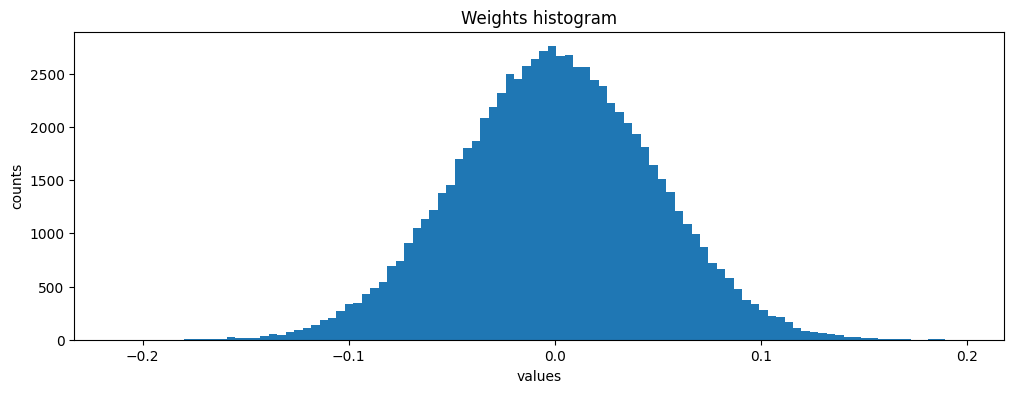

In [ ]:
model_name = "n3_layers_sigmoid_havier"
model = SimpleMNIST_NN(n_layers=3)
model.apply(init_weights)

# Plotting weights values of first (input) layer
plt.figure(figsize=(12, 4))
plt.hist(
    list(model.layers.children())[0].weight.cpu().detach().numpy().reshape(-1), bins=100
)
plt.title("Weights histogram")
plt.xlabel("values")
plt.ylabel("counts")
plt.show()

In [ ]:
trainer = L.Trainer(
    max_epochs=5,
    logger=TensorBoardLogger(save_dir=f"logs/{model_name}"),
    num_sanity_val_steps=0,
)

pipeline = Pipeline(model=model, exp_name=model_name)

trainer.fit(model=pipeline, train_dataloaders=train_loader, val_dataloaders=val_loader)

history = pipeline.history
history["epo—Åhs"] = trainer.max_epochs
history_plotter.add(history)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | SimpleMNIST_NN   | 99.7 K | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
99.7 K    Trainable params
0         Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callb

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=5` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


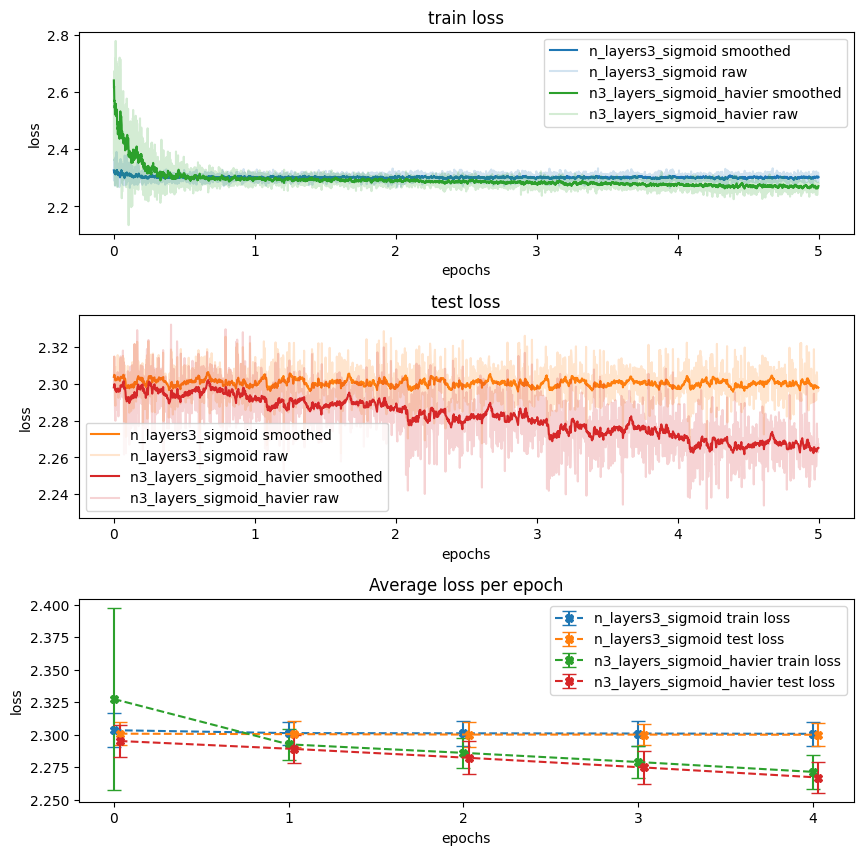

In [ ]:
history_plotter.plot(["n_layers3_sigmoid", model_name])

–í–∏–¥–∏–º, —á—Ç–æ –Ω–µ–π—Ä–æ—Å–µ—Ç—å —Å—Ç–∞–ª–∞ —Ö–æ—Ç—å –∫–∞–∫-—Ç–æ —É—á–∏—Ç—å—Å—è.

# –°–ª–æ–∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏

## Internal covariate shift

–ö–∞–∫ –º—ã —É–≤–∏–¥–µ–ª–∏, –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –≤–µ—Å–æ–≤ –ø–æ–º–æ–≥–∞–µ—Ç —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –¥–∏—Å–ø–µ—Ä—Å–∏—é –Ω–∞ –≤—ã—Ö–æ–¥–µ –∏–∑ —Å–ª–æ—è. –û–¥–Ω–∞–∫–æ –ø–æ—Å–ª–µ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –æ–±—Ä–∞—Ç–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è –æ—à–∏–±–∫–∏ –≤–µ—Å–∞ –≤ —Å–ª–æ–µ –∏–∑–º–µ–Ω—è—é—Ç—Å—è, –∏ —É –Ω–∞—Å –ø—Ä–æ–ø–∞–¥–∞–µ—Ç –≥–∞—Ä–∞–Ω—Ç–∏—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π.

–í [—Å—Ç–∞—Ç—å–µ –ø—Ä–æ Batch Normalization üéì[arxiv]](https://arxiv.org/pdf/1502.03167.pdf) –∞–≤—Ç–æ—Ä—ã –ø—Ä–µ–¥–ª–æ–∂–∏–ª–∏ —Ä–µ—à–µ–Ω–∏–µ —ç—Ç–æ–π –ø—Ä–æ–±–ª–µ–º—ã, –Ω–∞–∑–≤–∞–≤ –µ–≥–æ **internal covariate shift**.

**Internal covariate shift** ‚Äî —ç—Ç–æ –∏–∑–º–µ–Ω–µ–Ω–∏–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—ã—Ö–æ–¥–∞ —Å–ª–æ—è –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –∏–∑-–∑–∞ –∏–∑–º–µ–Ω–µ–Ω–∏—è –æ–±—É—á–∞–µ–º—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è.



<img src ="https://ml.gan4x4.ru/msu/dev-2.2/L07/out/internal_covariate_shift_example.png" width="1000">

–ü—É—Å—Ç—å —É –Ω–∞—Å $k$-—ã–π –Ω–µ–π—Ä–æ–Ω $i$-–≥–æ —Å–ª–æ—è –ø–µ—Ä–µ–≤–æ–¥–∏—Ç –≤—ã—Ö–æ–¥ $i$‚àí1 —Å–ª–æ—è —Å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º <font color='#F9B041'>$f^{(j)}_{i-1}(x)$</font> –≤ –Ω–æ–≤–æ–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ —Å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º <font color='#5D5DA6'>$f^{(k)}_{i}(x)$</font>.

–ü—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏:
- –Ω–µ–π—Ä–æ—Å–µ—Ç—å –¥–µ–ª–∞–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ,
- —Å—á–∏—Ç–∞–µ—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å,
- –¥–µ–ª–∞–µ—Ç—Å—è –æ–±—Ä–∞—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ –æ—à–∏–±–∫–∏,
- –æ–±–Ω–æ–≤–ª—è—é—Ç—Å—è –≤–µ—Å–∞.


–ü–æ—Å–ª–µ –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è –≤–µ—Å–æ–≤ $k$-—ã–π –Ω–µ–π—Ä–æ–Ω $i$-–≥–æ —Å–ª–æ—è –±—É–¥–µ—Ç –ø–µ—Ä–µ–≤–æ–¥–∏—Ç—å –≤—ã—Ö–æ–¥—ã $i$‚àí1 —Å–ª–æ—è <font color='#F9B041'>$f^{(j)}_{i-1}(x)$</font> –≤ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ —Å –¥—Ä—É–≥–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º <font color='#5D5DA6'>$f^{*(k)}_{i}(x)$</font>.

–ü—Ä–∏ —ç—Ç–æ–º $i$+1 —Å–ª–æ–π —É—á–∏–ª—Å—è —Ä–∞–±–æ—Ç–∞—Ç—å —Å–æ —Å—Ç–∞—Ä—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º  <font color='#5D5DA6'>$f^{(k)}_{i}(x)$</font>, –∏ –±—É–¥–µ—Ç —Ö—É–∂–µ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å <font color='#5D5DA6'>$f^{*(k)}_{i}(x)$</font>.

### –ü–ª–æ—Ö–æ–π –≤–∞—Ä–∏–∞–Ω—Ç –±–æ—Ä—å–±—ã —Å —ç—Ç–∏–º

–ú–æ–∂–Ω–æ –Ω–∞ –∫–∞–∂–¥–æ–º —Å–ª–æ–µ –Ω–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å **–∫–∞–∂–¥—ã–π –ø—Ä–∏–∑–Ω–∞–∫** (–≤—ã—Ö–æ–¥ –∫–∞–∂–¥–æ–≥–æ –Ω–µ–π—Ä–æ–Ω–∞), –∏—Å–ø–æ–ª—å–∑—É—è —Å—Ä–µ–¥–Ω–µ–µ –∏ –¥–∏—Å–ø–µ—Ä—Å–∏—é –ø–æ –±–∞—Ç—á—É:

$$ \hat{x}_{i} = \frac{x_{i} - \mu_{B}}{\sigma_{B} + \epsilon}$$




–ü—Ä–æ–±–ª–µ–º–∞ –≤ —Ç–æ–º, —á—Ç–æ —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –º—ã –º–æ–∂–µ–º –ø–æ–ø–∞—Å—Ç—å –≤ –æ–±–ª–∞—Å—Ç—å –ª–∏–Ω–µ–π–Ω–æ–π —Å–æ—Å—Ç–∞–≤–ª—è—é—â–µ–π –Ω–∞—à–µ–π —Ñ—É–Ω–∫—Ü–∏–∏. –ù–∞–ø—Ä–∏–º–µ—Ä, –≤ —Å–ª—É—á–∞–µ —Å–∏–≥–º–æ–∏–¥—ã:

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L07/out/domain_of_linear_of_sigmoid_function.png" width="500"></center>

–ü–æ–ª—É—á–∞–µ–º –Ω–∞–±–æ—Ä –ª–∏–Ω–µ–π–Ω—ã—Ö —Å–ª–æ–µ–≤ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏ –±–µ–∑ —Ñ—É–Ω–∫—Ü–∏–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –≤—Å–µ –≤—ã—Ä–æ–∂–¥–∞–µ—Ç—Å—è –≤ –æ–¥–Ω–æ—Å–ª–æ–π–Ω—É—é —Å–µ—Ç—å. –ù–µ —Ç–æ, —á—Ç–æ –Ω–∞–º –Ω–∞–¥–æ.

## Batch Normalization

 <center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L07/out/batchnormalization.png" width="400"> </center>

–ù–∞–¥–æ –¥–∞—Ç—å –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ **–≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –ø–µ—Ä–µ–º–µ—â–∞—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—ã—Ö–æ–¥–æ–≤** —Å–ª–æ—è –∏–∑ –æ–±–ª–∞—Å—Ç–∏ $0$ –∏ —Å–∞–º–æ–π **–ø–æ–¥–±–∏—Ä–∞—Ç—å –¥–∏—Å–ø–µ—Ä—Å–∏—é**. –î–ª—è —ç—Ç–æ–π —Ü–µ–ª–∏ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è **–±–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è** (*batch normalization*), –∫–æ—Ç–æ—Ä–∞—è –≤–≤–æ–¥–∏—Ç –≤ –Ω–µ–π—Ä–æ–Ω–Ω—É—é —Å–µ—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—É—é –æ–ø–µ—Ä–∞—Ü–∏—é –º–µ–∂–¥—É —Å–æ—Å–µ–¥–Ω–∏–º–∏ —Å–∫—Ä—ã—Ç—ã–º–∏ —Å–ª–æ—è–º–∏.

–û–Ω–∞ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ **–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏** –≤—Ö–æ–¥—è—â–∏—Ö (–≤ —Å–ª–æ–π –±–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏) –∑–Ω–∞—á–µ–Ω–∏–π, –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –æ—Ç —Å–∫—Ä—ã—Ç–æ–≥–æ —Å–ª–æ—è, **–º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è** –∏ **—Å–¥–≤–∏–≥–∞** —Å –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ–º –¥–≤—É—Ö –Ω–æ–≤—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –ø–µ—Ä–µ–¥–∞—á–∏ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–∞ –≤—Ö–æ–¥ —Å–ª–µ–¥—É—é—â–µ–º—É —Å–∫—Ä—ã—Ç–æ–º—É —Å–ª–æ—é.

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L07/out/batch_normalization_compute_moving_average.png" width="1000"></center>

–ü–∞—Ä–∞–º–µ—Ç—Ä—ã, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã–µ –≤ –±–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ ($\gamma$ ‚Äî –ø–∞—Ä–∞–º–µ—Ç—Ä, –æ—Ç–≤–µ—á–∞—é—â–∏–π –∑–∞ **—Å–∂–∞—Ç–∏–µ**, –∏ $\beta$ ‚Äî –ø–∞—Ä–∞–º–µ—Ç—Ä, –æ—Ç–≤–µ—á–∞—é—â–∏–π –∑–∞ **—Å–¥–≤–∏–≥**), —è–≤–ª—è—é—Ç—Å—è **–æ–±—É—á–∞–µ–º—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏** (–Ω–∞–ø–æ–¥–æ–±–∏–µ –≤–µ—Å–æ–≤ –∏ —Å–º–µ—â–µ–Ω–∏–π —Å–∫—Ä—ã—Ç—ã—Ö —Å–ª–æ–µ–≤).

–ü–æ–º–∏–º–æ –æ–±—É—á–∞–µ–º—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ $\gamma$ –∏ $\beta$ –≤ —Å–ª–æ–µ –±–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ —Å—É—â–µ—Å—Ç–≤—É—é—Ç —Ç–∞–∫–∂–µ –Ω–µ–æ–±—É—á–∞–µ–º—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: **—Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ –º–∞—Ç–æ–∂–∏–¥–∞–Ω–∏—è** (_Mean Moving Average_) –∏ **—Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ –¥–∏—Å–ø–µ—Ä—Å–∏–π** (_Variance Moving Average_), —Å–ª—É–∂–∞—â–∏–µ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è —Å–æ—Å—Ç–æ—è–Ω–∏—è —Å–ª–æ—è –±–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏.

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L07/out/batchnorm_layer_parameters.png" width="900"></center>

–ü–∞—Ä–∞–º–µ—Ç—Ä—ã $\gamma$, $\beta$, –∞ —Ç–∞–∫–∂–µ –æ–±–∞ —Å–∫–æ–ª—å–∑—è—â–∏—Ö —Å—Ä–µ–¥–Ω–∏—Ö –≤—ã—á–∏—Å–ª—è—é—Ç—Å—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å–ª–æ—è –±–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –æ—Ç–¥–µ–ª—å–Ω–æ –∏ —è–≤–ª—è—é—Ç—Å—è –≤–µ–∫—Ç–æ—Ä–∞–º–∏ —Å **–¥–ª–∏–Ω–æ–π, —Ä–∞–≤–Ω–æ–π –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –≤—Ö–æ–¥—è—â–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.**

–í –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è –º—ã –ø–æ–¥–∞–µ–º –≤ –Ω–µ–π—Ä–æ–Ω–Ω—É—é —Å–µ—Ç—å **–ø–æ –æ–¥–Ω–æ–º—É –º–∏–Ω–∏-–±–∞—Ç—á—É –∑–∞ —Ä–∞–∑**. –ü—Ä–æ—Ü–µ–¥—É—Ä—É –æ–±—Ä–∞–±–æ—Ç–∫–∏ –∑–Ω–∞—á–µ–Ω–∏–π –æ–¥–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ $x^{(k)}$ (—Ñ–∏–æ–ª–µ—Ç–æ–≤–∞—è –∫–æ–ª–æ–Ω–∫–∞ –Ω–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏ –Ω–∏–∂–µ), –∫–æ—Ç–æ—Ä—ã–π –¥–ª—è –∫—Ä–∞—Ç–∫–æ—Å—Ç–∏ –º—ã –±—É–¥–µ–º –æ–±–æ–∑–Ω–∞—á–∞—Ç—å $x$,  –∏–∑ –æ–¥–Ω–æ–≥–æ –º–∏–Ω–∏-–±–∞—Ç—á–∞ $ B = \{x_{1},\ldots, x_{m}\} $ –º–æ–∂–Ω–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º:



–®–∞–≥ **–º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è** Gamma ($Œ≥$) –∏ —à–∞–≥ **—Å–¥–≤–∏–≥–∞** Beta ($Œ≤$) —è–≤–ª—è—é—Ç—Å—è –≥–ª–∞–≤–Ω—ã–º –Ω–æ–≤—à–µ—Å—Ç–≤–æ–º –±–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏, –ø–æ—Å–∫–æ–ª—å–∫—É, –≤ –æ—Ç–ª–∏—á–∏–µ –æ—Ç –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–Ω–æ–≥–æ –ø—Ä–∏–º–µ—Ä–∞, –Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –±–æ–ª—å—à–µ –Ω–µ –æ–±—è–∑–∞–Ω—ã –∏–º–µ—Ç—å —Å—Ä–µ–¥–Ω–µ–µ, —Ä–∞–≤–Ω–æ–µ $0$, –∏ –µ–¥–∏–Ω–∏—á–Ω—É—é –¥–∏—Å–ø–µ—Ä—Å–∏—é. –ë–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ–∑–≤–æ–ª—è–µ—Ç —Å–¥–≤–∏–≥–∞—Ç—å —Å—Ä–µ–¥–Ω–µ–µ –Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∏ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞—Ç—å –¥–∏—Å–ø–µ—Ä—Å–∏—é. –§–∞–∫—Ç–∏—á–µ—Å–∫–∏ —Ç–µ–ø–µ—Ä—å **–Ω–µ–π—Ä–æ—Å–µ—Ç—å –¥–∞–∂–µ –º–æ–∂–µ—Ç –æ—Ç–º–µ–Ω–∏—Ç—å –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –µ—Å–ª–∏ —Å—á–∏—Ç–∞–µ—Ç –µ–µ –Ω–µ–Ω—É–∂–Ω–æ–π.**

–î–ª—è –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏ –ø—Ä–æ–∏–ª–ª—é—Å—Ç—Ä–∏—Ä—É–µ–º —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –Ω–∞ —Å–ª–µ–¥—É—é—â–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏:

<img src ="https://ml.gan4x4.ru/msu/dev-2.2/L07/out/batch_normalization_compute_moving_average_scheme.png" width="1000">

–ü–æ—Å–ª–µ –ø—Ä—è–º–æ–≥–æ –ø—Ä–æ—Ö–æ–¥–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã $\gamma$ –∏ $\beta$ **–æ–±–Ω–æ–≤–ª—è—é—Ç—Å—è —á–µ—Ä–µ–∑ –æ–±—Ä–∞—Ç–Ω–æ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ –æ—à–∏–±–∫–∏** —Ç–∞–∫ –∂–µ, –∫–∞–∫ –∏ –≤–µ—Å–∞ —Å–∫—Ä—ã—Ç—ã—Ö —Å–ª–æ–µ–≤.

### –°–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ

–í—ã—à–µ –º—ã –æ–±—Å—É–∂–¥–∞–ª–∏ —Ç–æ, —á—Ç–æ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è —Å–ª–æ–π **–±–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏** —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏–µ **—Å—Ä–µ–¥–Ω–µ–≥–æ –∏ –¥–∏—Å–ø–µ—Ä—Å–∏–∏** –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–º **–º–∏–Ω–∏-–±–∞—Ç—á–µ**. –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ –Ω–∞–º –Ω—É–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ **–æ–¥–Ω–æ–º –æ–±—ä–µ–∫—Ç–µ**. –í–æ –≤—Ä–µ–º—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –±–∞—Ç—á —É –Ω–∞—Å —É–∂–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç. –û—Ç–∫—É–¥–∞ –±—Ä–∞—Ç—å —Å—Ä–µ–¥–Ω–µ–µ –∏ –¥–∏—Å–ø–µ—Ä—Å–∏—é?

–í–æ –≤—Ä–µ–º—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è **—Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ**, –∫–æ—Ç–æ—Ä–æ–µ –±—ã–ª–æ **—Ä–∞—Å—Å—á–∏—Ç–∞–Ω–æ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–æ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è**.

$$\large \mu_{mov_{B}} = (1-\alpha)\mu_{mov_{B-1}}+\alpha\mu_{B} $$

$$\large \sigma_{mov_{B}} = (1-\alpha)\sigma_{mov_{B-1}}+\alpha\sigma_{B} $$

–û–±—ã—á–Ω–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –ø–∞—Ä–∞–º–µ—Ç—Ä $\alpha = 0.1$

–î–ª—è –ø–µ—Ä–µ–≤–æ–¥–∞ –º–æ–¥–µ–ª–∏ –∏–∑ —Ä–µ–∂–∏–º–∞ –æ–±—É—á–µ–Ω–∏—è –≤ —Ä–µ–∂–∏–º —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –æ–±—Ä–∞—Ç–Ω–æ –≤ PyTorch –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è `model.train()` –∏ `model.eval()`.

$$
\begin{array}{c|c}
\large{\text{model.train()}}&\ \large{\text{model.eval()}}\\  \hline
\large{\text{–ë–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –∏—Å–ø–æ–ª—å–∑—É–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –ø–æ –±–∞—Ç—á—É}}&\large{\text{–ë–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –∏—Å–ø–æ–ª—å–∑—É–µ—Ç —Å–∫–æ–ª—å–∑—è—â–∏–µ —Å—Ä–µ–¥–Ω–∏–µ}}\\
\large{\text{C–∫–æ–ª—å–∑—è—â–∏–µ —Å—Ä–µ–¥–Ω–∏–µ –∫–æ–ø—è—Ç—Å—è}}
\end{array}
$$



–ü–æ—á–µ–º—É –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –∏–º–µ–Ω–Ω–æ **—Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ**, –∞ **–Ω–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –≤—Å–µ–π –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏**?

–ü—Ä–∏ —Ç–∞–∫–æ–º –ø–æ–¥—Ö–æ–¥–µ –Ω–∞–º –±—ã –ø—Ä–∏—à–ª–æ—Å—å —Ö—Ä–∞–Ω–∏—Ç—å **—Å—Ä–µ–¥–Ω–∏–µ –≤—Å–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤** –¥–ª—è **–≤—Å–µ—Ö –±–∞—Ç—á–µ–π**, –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö —á–µ—Ä–µ–∑ –Ω–µ–π—Ä–æ—Å–µ—Ç—å –≤ —Ö–æ–¥–µ –æ–±—É—á–µ–Ω–∏—è. –≠—Ç–æ —É–∂–∞—Å–Ω–æ –Ω–µ–≤—ã–≥–æ–¥–Ω–æ –ø–æ –ø–∞–º—è—Ç–∏. –í–º–µ—Å—Ç–æ —ç—Ç–æ–≥–æ **—Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ** –≤—ã—Å—Ç—É–ø–∞–µ—Ç –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–Ω–æ–π –æ—Ü–µ–Ω–∫–∏ **—Å—Ä–µ–¥–Ω–µ–≥–æ –∏ –¥–∏—Å–ø–µ—Ä—Å–∏–∏** –æ–±—É—á–∞—é—â–µ–≥–æ –Ω–∞–±–æ—Ä–∞. –í —ç—Ç–æ–º —Å–ª—É—á–∞–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —Ä–µ—Å—É—Ä—Å–æ–≤ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è: –Ω–∞–º –Ω—É–∂–Ω–æ **—Ö—Ä–∞–Ω–∏—Ç—å –≤ –ø–∞–º—è—Ç–∏ —Ç–æ–ª—å–∫–æ –æ–¥–Ω–æ —á–∏—Å–ª–æ** ‚Äî –∑–Ω–∞—á–µ–Ω–∏–µ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–º —à–∞–≥–µ.

–ü—Ä–æ–∏–ª–ª—é—Å—Ç—Ä–∏—Ä–æ–≤–∞—Ç—å –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ –º–æ–∂–Ω–æ –Ω–∞ —Å–ª–µ–¥—É—é—â–µ–º –ø—Ä–∏–º–µ—Ä–µ:

–ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ —É –Ω–∞—Å –µ—Å—Ç—å –º–∞—Å—Å–∏–≤ –æ–±—ä–µ–∫—Ç–æ–≤, –æ–±–ª–∞–¥–∞—é—â–∏—Ö –Ω–µ–∫–æ—Ç–æ—Ä—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º $x$ (–æ–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞), –∏ –Ω–µ–∫–æ—Ç–æ—Ä—ã–π —á–µ—Ä–Ω—ã–π —è—â–∏–∫, –∏–∑–≤–ª–µ–∫–∞—é—â–∏–π –ø–æ $k$ –æ–±—ä–µ–∫—Ç–æ–≤ –∏–∑ —ç—Ç–æ–≥–æ –º–∞—Å—Å–∏–≤–∞ (Data loader). –ù–∞—à–∞ –∑–∞–¥–∞—á–∞ ‚Äî –¥–∞—Ç—å –æ—Ü–µ–Ω–∫—É –æ–∂–∏–¥–∞–µ–º–æ–º—É —Å—Ä–µ–¥–Ω–µ–º—É —ç—Ç–∏—Ö $k$ –æ–±—ä–µ–∫—Ç–æ–≤. –í –¥–∞–Ω–Ω–æ–º –ø—Ä–∏–º–µ—Ä–µ –¥–ª—è –ø—Ä–æ—Å—Ç–æ—Ç—ã –±—É–¥–µ–º –∏–∑–≤–ª–µ–∫–∞—Ç—å $k$ –æ–±—ä–µ–∫—Ç–æ–≤ –∏–∑ –Ω–µ–∫–æ–µ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å–ª—É—á–∞–π–Ω—ã–º –æ–±—Ä–∞–∑–æ–º.

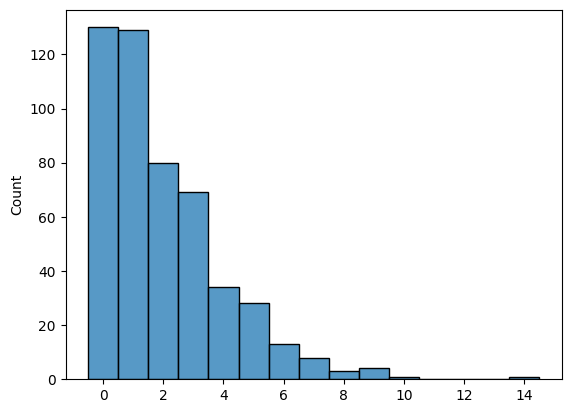

means score: 1.99956800, [80112 bytes]
ema sccore: 1.97321201, [32 bytes]


In [ ]:
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sample = np.random.negative_binomial(2, 0.5, 500)
sns.histplot(data=sample, discrete=True)
plt.show()

ema = 0
alpha = 0.01
means = np.array([])

for i in range(10000):
    sample = np.random.negative_binomial(2, 0.5, 50)
    ema = (1 - alpha) * ema + alpha * sample.mean()
    means = np.append(means, sample.mean())

print(f"means score: {means.mean():.8f}, [{sys.getsizeof(means)} bytes]")
print(f"ema sccore: {ema:.8f}, [{sys.getsizeof(ema)} bytes]")

–í–∏–¥–Ω–æ, —á—Ç–æ –º—ã –ø–æ–ª—É—á–∏–ª–∏ –¥–æ–≤–æ–ª—å–Ω–æ —Ç–æ—á–Ω—É—é –æ—Ü–µ–Ω–∫—É, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–≤ —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ.

### Batch Normalization –∫–∞–∫ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è

–ü–æ—á–µ–º—É –¥–ª—è –Ω–µ–π—Ä–æ—Å–µ—Ç–∏ —Å –±–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–µ–π –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–µ learning rate?

–û–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è, **–±–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è** –¥–µ–ª–∞–µ—Ç **–Ω–µ—è–≤–Ω—É—é —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—é –Ω–∞ –≤–µ—Å–∞**.



–í—Å–ø–æ–º–Ω–∏–º —Ñ–æ—Ä–º—É–ª—ã:

$$ \hat{x}_{i} = \frac{x_{i} - \mu_{B}}{\sigma_{B} + \epsilon}$$

$$ \text{BN}_{\gamma, \beta}(x_{i}) = \gamma \hat{x}_{i} + \beta $$

–¢–∞–∫ –∫–∞–∫ –º—ã —à–∫–∞–ª–∏—Ä—É–µ–º, —Ç–æ –¥–æ–º–Ω–æ–∂–µ–Ω–∏–µ –≤–µ—Å–æ–≤ $W$ –Ω–∞ –∫–æ–Ω—Å—Ç–∞–Ω—Ç—É $a$ –Ω–µ –º–µ–Ω—è–µ—Ç –≤—ã—Ö–æ–¥–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å–ª–æ—è:

$$BN((aW)u) = BN(Wu)$$

–ì—Ä–∞–¥–∏–µ–Ω—Ç —Å–ª–æ—è –ø–æ –≤—Ö–æ–¥—É –Ω–µ –º–µ–Ω—è–µ—Ç—Å—è:

$$\dfrac {\partial BN((aW)u)} {\partial u} = \dfrac {\partial BN(Wu)} {\partial u}$$

–ê **–≥—Ä–∞–¥–∏–µ–Ω—Ç –ø–æ –≤–µ—Å–∞–º —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è** –≤ $a$ —Ä–∞–∑:

$$\dfrac {\partial BN((aW)u)} {\partial aW} = \dfrac 1 a \dfrac {\partial BN(Wu)} {\partial W} $$

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –Ω–µ–π—Ä–æ—Å–µ—Ç—å –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –Ω–µ –¥–∞–µ—Ç –±–æ–ª—å—à–∏–º –≤–µ—Å–∞–º —Ä–∞—Å—Ç–∏.

### –°–≥–ª–∞–∂–∏–≤–∞—é—â–∏–π —ç—Ñ—Ñ–µ–∫—Ç Batch Normalization

**Batch Normalization** –±—ã–ª–∞ —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–Ω–∞ –Ω–∞ –∏–¥–µ–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –∫–æ—Ä—Ä–µ–∫—Ü–∏–∏ **Internal covariate shift**. –í 2019 –≥–æ–¥—É –≤—ã—à–ª–∞ [—Å—Ç–∞—Ç—å—è üéì[arxiv]](https://arxiv.org/pdf/1805.11604.pdf), –∫–æ—Ç–æ—Ä–∞—è –ø–æ–∫–∞–∑–∞–ª–∞, —á—Ç–æ –≤–ª–∏—è–Ω–∏–µ –∫–æ—Ä—Ä–µ–∫—Ü–∏–∏ **Internal covariate shift** –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—É—á–µ–Ω–∏—è –Ω–µ —Ç–∞–∫ –≤–µ–ª–∏–∫–æ, –∫–∞–∫ —Å—á–∏—Ç–∞–ª–∏ –∞–≤—Ç–æ—Ä—ã **Batch Normalization**.

–î—Ä—É–≥–∏–º –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–º —ç—Ñ—Ñ–µ–∫—Ç–æ–º Batch Normalization –æ–∫–∞–∑–∞–ª–æ—Å—å **—Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ –ª–∞–Ω–¥—à–∞—Ñ—Ç–∞** —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å. Batch Normalization —É–ª—É—á—à–∞–µ—Ç –≥–ª–∞–¥–∫–æ—Å—Ç—å –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞ —Ä–µ—à–µ–Ω–∏–π –∏ –æ–±–ª–µ–≥—á–∞–µ—Ç –ø–æ–∏—Å–∫ –≤ –Ω–µ–º –º–∏–Ω–∏–º—É–º–∞. –ò–º–µ–Ω–Ω–æ –±–ª–∞–≥–æ–¥–∞—Ä—è —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—é –ª–∞–Ω–¥—à–∞—Ñ—Ç–∞ Batch Normalization —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å –∑–∞—Ç—É—Ö–∞–Ω–∏–µ–º –∏ –≤–∑—Ä—ã–≤–æ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞.


<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L07/out/batchnorm_helps_find_minimum_of_function.jpg" width="900"></center>

### –ò—Å–ø–æ–ª—å–∑—É–µ–º Batch Normalization –≤ PyTorch

–¢–∞–∫ –∫–∞–∫ –Ω–∞—à–∞ –º–æ–¥–µ–ª—å –∏–∑-–∑–∞ **Batch Normalization** –≤–µ–¥–µ—Ç —Å–µ–±—è –ø–æ-—Ä–∞–∑–Ω–æ–º—É –≤–æ –≤—Ä–µ–º—è **–æ–±—É—á–µ–Ω–∏—è** –∏ –≤–æ –≤—Ä–µ–º—è **—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è**, –º—ã –¥–æ–ª–∂–Ω—ã –ø—Ä—è–º–æ –µ–π —Å–æ–æ–±—â–∞—Ç—å, –æ–±—É—á–∞–µ—Ç—Å—è –æ–Ω–∞ —Å–µ–π—á–∞—Å –∏–ª–∏ –Ω–µ—Ç. –î–µ–ª–∞–µ—Ç—Å—è —ç—Ç–æ –ø—Ä–∏ –ø–æ–º–æ—â–∏ —Ñ—É–Ω–∫—Ü–∏–π `model.train` –∏ `model.eval`

```python
# Pseudocode for training a model in pure pytorch
def train(model, optimizer, criterion, train_loader, val_loader):
    for epoch in range(epochs):
        model.train()
        for train_batch in train_loader:
            do_train_step(model, train_batch, optimizer, criterion)
        
        model.eval()
        for val_batch in val_loader:
            do_test_step(model, val_batch, optimizer, criterion)
        
```

–ü—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è PyTorch Lightning **–≥–∞—Ä–∞–Ω—Ç–∏—Ä—É–µ—Ç—Å—è**, —á—Ç–æ —Å–≤—è–∑–∞–Ω–Ω—ã–π —Å –æ–±—É—á–µ–Ω–∏–µ–º `training_step()` –±—É–¥–µ—Ç –≤—ã–ø–æ–ª–Ω–µ–Ω –¥–ª—è –º–æ–¥–µ–ª–∏ –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ `model.train()` –∏ —á—Ç–æ —Å–≤—è–∑–∞–Ω–Ω—ã–π —Å –∑–∞–ø—É—Å–∫–æ–º –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ `validation_step()` –±—É–¥–µ—Ç –≤—ã–ø–æ–ª–Ω–µ–Ω –¥–ª—è –º–æ–¥–µ–ª–∏ –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ `model.eval()`. **–≠—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –Ω–∞–º —É–ø—Ä–æ—Å—Ç–∏—Ç—å –∫–æ–¥ –∏ –Ω–µ –¥–æ–ø—É—Å—Ç–∏—Ç—å –æ—à–∏–±–∫—É**.

In [ ]:
class SimpleMNIST_NN_Batchnorm(nn.Module):
    def __init__(self, n_layers):
        super().__init__()
        self.n_layers = n_layers
        layers = [
            nn.Linear(28 * 28, 100, bias=False),
            nn.BatchNorm1d(100),
            nn.Sigmoid(),
        ]
        for _ in range(0, n_layers - 1):
            layers.append(nn.Linear(100, 100, bias=False))
            layers.append(nn.BatchNorm1d(100))
            layers.append(nn.Sigmoid())
        layers.append(nn.Linear(100, 10))
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.layers(x)
        return x

In [ ]:
model_name = "batchnorm2"
model = SimpleMNIST_NN_Batchnorm(n_layers=3)

In [ ]:
trainer = L.Trainer(
    max_epochs=5,
    logger=TensorBoardLogger(save_dir=f"logs/{model_name}"),
    num_sanity_val_steps=0,
)

pipeline = Pipeline(model=model, exp_name=model_name)

trainer.fit(model=pipeline, train_dataloaders=train_loader, val_dataloaders=val_loader)

history = pipeline.history
history["epo—Åhs"] = trainer.max_epochs
history_plotter.add(history)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type                     | Params | Mode 
---------------------------------------------------------------
0 | model     | SimpleMNIST_NN_Batchnorm | 100 K  | train
1 | criterion | CrossEntropyLoss         | 0      | train
---------------------------------------------------------------
100 K     Trainable params
0         Non-trainable params
100 K     Total params
0.400     Total estimated model params size (MB)
13        Modules in train mode
0         Modules i

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=5` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


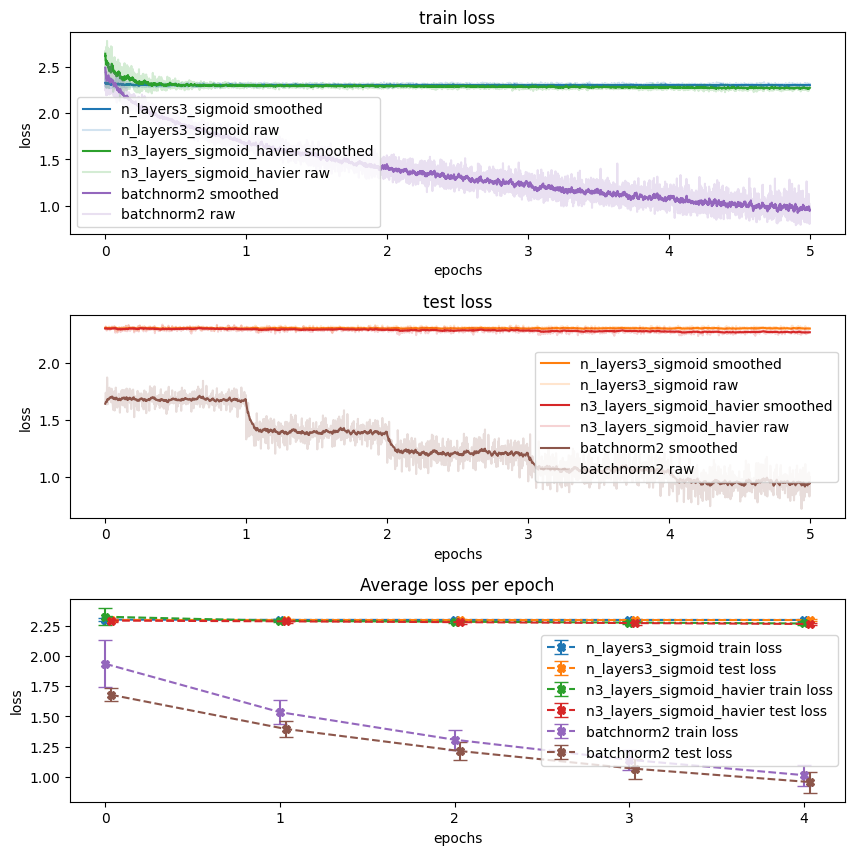

In [ ]:
history_plotter.add(history)
history_plotter.plot(["n_layers3_sigmoid", "n3_layers_sigmoid_havier", model_name])

–ü–æ–ø—Ä–æ–±—É–µ–º, —Å–æ–≥–ª–∞—Å–Ω–æ —Å–æ–≤–µ—Ç–∞–º, —É–≤–µ–ª–∏—á–∏—Ç—å learning rate:

In [ ]:
model_name = "batchnorm_increased_lr"
model = SimpleMNIST_NN_Batchnorm(n_layers=3)

trainer = L.Trainer(
    max_epochs=5,
    logger=TensorBoardLogger(save_dir=f"logs/{model_name}"),
    num_sanity_val_steps=0,
)

pipeline = Pipeline(model=model, exp_name=model_name, optimizer_kwargs={"lr": 1e-2})

trainer.fit(model=pipeline, train_dataloaders=train_loader, val_dataloaders=val_loader)

history = pipeline.history
history["epo—Åhs"] = trainer.max_epochs
history_plotter.add(history)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type                     | Params | Mode 
---------------------------------------------------------------
0 | model     | SimpleMNIST_NN_Batchnorm | 100 K  | train
1 | criterion | CrossEntropyLoss         | 0      | train
---------------------------------------------------------------
100 K     Trainable params
0         Non-trainable params
100 K     Total params
0.400     Total estimated model params size (MB)
13        Modules in train mode
0         Modules i

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=5` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


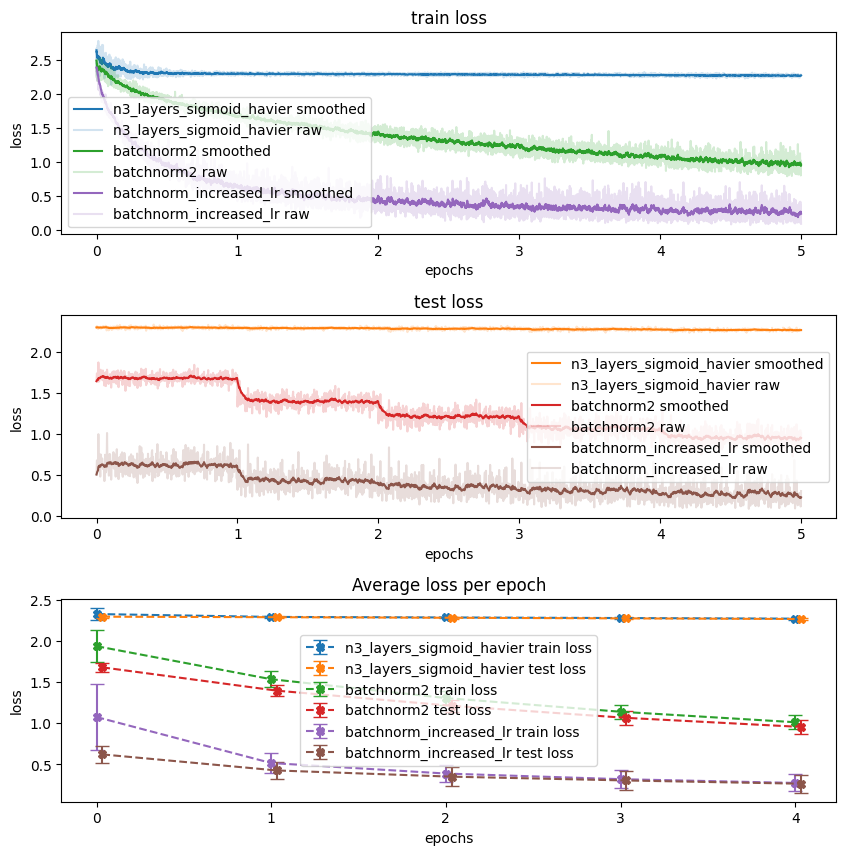

In [ ]:
history_plotter.plot(["n3_layers_sigmoid_havier", "batchnorm2", model_name])

### –°–æ–≤–µ—Ç—ã –ø–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—é Batch Normalization

–°—Ç–æ–∏—Ç –ø–æ–º–Ω–∏—Ç—å, —á—Ç–æ —Å –±–∞—Ç—á-–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–µ–π:

* –ß–µ–º **–º–µ–Ω—å—à–µ —Ä–∞–∑–º–µ—Ä –±–∞—Ç—á–∞ –≤ –æ–±—É—á–µ–Ω–∏–∏**, —Ç–µ–º **—Ö—É–∂–µ** –±—É–¥–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å Batch Normalization.

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L07/out/batchnorm_batch_size.png" width="500"></center>

<center><em>Source: <a href="https://arxiv.org/pdf/1803.08494.pdf">Group Normalization</a></em></center>





* –í —Å–ª–æ–µ, –ø–æ—Å–ª–µ –∫–æ—Ç–æ—Ä–æ–≥–æ –ø–æ—Å—Ç–∞–≤–∏–ª–∏ Batch Normalization, –º–æ–∂–Ω–æ **—É–±—Ä–∞—Ç—å bias** (–ø–∞—Ä–∞–º–µ—Ç—Ä $\beta$ –≤ Batch Normalization –±–µ—Ä–µ—Ç —ç—Ç—É —Ä–æ–ª—å –Ω–∞ —Å–µ–±—è).

* –î—Ä—É–≥–æ–µ —Ä–∞—Å–ø–∏—Å–∞–Ω–∏–µ **learning rate: –±–æ–ª—å—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ** –≤ –Ω–∞—á–∞–ª–µ –æ–±—É—á–µ–Ω–∏—è –∏ –±—ã—Å—Ç—Ä–æ–µ —É–º–µ–Ω—å—à–µ–Ω–∏–µ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è.

* –í–∞–∂–Ω–æ –ø–µ—Ä–µ–º–µ—à–∏–≤–∞—Ç—å –æ–±—ä–µ–∫—Ç—ã (—Å–æ—Å—Ç–∞–≤–ª—è—Ç—å –Ω–æ–≤—ã–µ –±–∞—Ç—á–∏) –º–µ–∂–¥—É —ç–ø–æ—Ö–∞–º–∏. –ï–¥–∏–Ω–∏—Ü–µ–π –æ–±—É—á–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ $\beta$ –∏ $\gamma$ —è–≤–ª—è—é—Ç—Å—è –±–∞—Ç—á–∏. –ï—Å–ª–∏ –∏—Ö –Ω–µ –ø–µ—Ä–µ–º–µ—à–∏–≤–∞—Ç—å, —Ç–æ –∏–∑ 6400 –æ–±—ä–µ–∫—Ç–æ–≤ –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –ø–æ–ª—É—á–∏–º –ª–∏—à—å 100 –æ–±—ä–µ–∫—Ç–æ–≤ (–ø—Ä–∏ —É—Å–ª–æ–≤–∏–∏, —á—Ç–æ –≤ –±–∞—Ç—á–µ 64 –æ–±—ä–µ–∫—Ç–∞) –¥–ª—è –æ–±—É—á–µ–Ω–∏—è $\beta$ –∏ $\gamma$. –î–∞–Ω–Ω–æ–µ —Ç—Ä–µ–±–æ–≤–∞–Ω–∏–µ —É—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π.

* –°–ª–æ–π Batch Normalization —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è —Å—Ç–∞–≤–∏—Ç—å –ø–æ—Å–ª–µ —Å–≤–µ—Ä—Ç–æ—á–Ω—ã—Ö —Å–ª–æ–µ–≤.

#### –°—Ç–∞–≤–∏—Ç—å Batch Normalization –¥–æ –∏–ª–∏ –ø–æ—Å–ª–µ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏?



##### –î–æ

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L07/out/batchnormalization_before_activation.png" width="350"></center>

* **–†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –∞–≤—Ç–æ—Ä–∞–º–∏ —Å—Ç–∞—Ç—å–∏, –≥–¥–µ –ø—Ä–µ–¥–ª–æ–∂–∏–ª–∏ Batch Normalization**.
* –í–æ –º–Ω–æ–≥–∏—Ö —Å–≤–µ—Ä—Ç–æ—á–Ω—ã—Ö –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞—Ö, –Ω–∞–ø—Ä–∏–º–µ—Ä, [**ResNet** üéì[arxiv]](https://arxiv.org/pdf/1512.03385.pdf) –∏ [**MobileNetV2** üéì[arxiv]](https://arxiv.org/pdf/1801.04381.pdf), Batch Normalization —Å—Ç–∞–≤–∏—Ç—Å—è –∏–º–µ–Ω–Ω–æ —Ç–∞–∫.


##### –ü–æ—Å–ª–µ

<center><img src ="https://ml.gan4x4.ru/msu/dev-2.2/L07/out/batchnormalization_after_activation.png" width="350"></center>

* –î–ª—è –ø–æ–ø—É–ª—è—Ä–Ω–æ–π **ReLU BN**, –ø–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–∞—è –¥–æ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏, –º–æ–∂–µ—Ç –ø—Ä–∏–≤–æ–¥–∏—Ç—å –≤ –æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω—ã—Ö —Å–ª—É—á–∞—è—Ö –∫ ‚Äú—É–º–∏—Ä–∞—é—â–µ–π **ReLU**‚Äù, –∫–æ–≥–¥–∞ –±–æ–ª—å—à–∞—è —á–∞—Å—Ç—å –µ–µ –≤—Ö–æ–¥–æ–≤ –º–µ–Ω—å—à–µ $0$, –∏ –ø–æ—ç—Ç–æ–º—É —á–µ—Ä–µ–∑ –Ω–∏—Ö –≥—Ä–∞–¥–∏–µ–Ω—Ç –Ω–µ –ø—Ä–æ—Ö–æ–¥–∏—Ç.



<center><img src ="https://ml.gan4x4.ru/msu/dev-2.1/L07/batchnormalization_before_or_after_relu.png" width="500">

<em>Source: <a href="https://github.com/ducha-aiki/caffenet-benchmark/blob/master/batchnorm.md">BN experiments</a></em></center>

**–í—ã–≤–æ–¥:** –í –æ–±—â–µ–º —Å–ª—É—á–∞–µ —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è —Ä–∞–∑–º–µ—â–∞—Ç—å —Å–ª–æ–π Batch Normalization –ø–µ—Ä–µ–¥ –∞–∫—Ç–∏–≤–∞—Ü–∏–µ–π.

*–≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å —Å —ç—Ç–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é —Å–ª–µ–¥—É–µ—Ç –≤ –ø–æ—Å–ª–µ–¥–Ω—é—é –æ—á–µ—Ä–µ–¥—å.*